<a href="https://colab.research.google.com/github/Paupau20/Colab/blob/main/ASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns

In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Vamos a empezar a cargar los archivos de excel 
Desde el 2015 hasta 2022


# Datos 2015


In [ ]:
df2015 = pd.read_excel('/content/gdrive/MyDrive/ASE/2015.xlsx')
df2015.info()
df2015.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189238 entries, 0 to 189237
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     189238 non-null  int64 
 1   Clave_Ent               189238 non-null  int64 
 2   Entidad                 189238 non-null  object
 3   Cve. Municipio          189238 non-null  int64 
 4   Municipio               189238 non-null  object
 5   Bien jurídico afectado  189238 non-null  object
 6   Tipo de delito          189238 non-null  object
 7   Subtipo de delito       189238 non-null  object
 8   Modalidad               189238 non-null  object
 9   Enero                   189238 non-null  int64 
 10  Febrero                 189238 non-null  int64 
 11  Marzo                   189238 non-null  int64 
 12  Abril                   189238 non-null  int64 
 13  Mayo                    189238 non-null  int64 
 14  Junio                   189238 non-n

(189238, 21)

In [ ]:
df2015.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0,0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Vemos que datos hacen falta
df2015.isna().sum()

Año                       0
Clave_Ent                 0
Entidad                   0
Cve. Municipio            0
Municipio                 0
Bien jurídico afectado    0
Tipo de delito            0
Subtipo de delito         0
Modalidad                 0
Enero                     0
Febrero                   0
Marzo                     0
Abril                     0
Mayo                      0
Junio                     0
Julio                     0
Agosto                    0
Septiembre                0
Octubre                   0
Noviembre                 0
Diciembre                 0
dtype: int64

In [ ]:
df2015b = df2015[(df2015['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2015['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2015b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,4,3,0,1,1,5,2,5,6,4
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,122,124,138,94,89,93,126,105,152,171
139,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,1,0,1
140,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,0,1,2,0,1,1,1,3
237,2015,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df2015b.shape)

(3862, 21)


In [ ]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher15 = df2015b.copy()
cocher15.loc[:,'Total'] = df2015b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher15.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,3,0,1,1,5,2,5,6,4,36
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,124,138,94,89,93,126,105,152,171,1434
139,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,1,0,1,2
140,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,1,2,0,1,1,1,3,9
237,2015,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cocher15.shape

(3862, 22)

In [ ]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
Aguas = cocher15.loc[(df2015b['Entidad'] == 'Aguascalientes')]
Aguas.shape

(22, 22)

In [ ]:
Aguas.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,3,0,1,1,5,2,5,6,4,36
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,124,138,94,89,93,126,105,152,171,1434
139,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,1,0,1,2
140,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,1,2,0,1,1,1,3,9
237,2015,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: title={'center': 'Aguascalientes Robo de coche de 4 ruedas Sin/Con violencia 2015'}, xlabel='Municipio'>

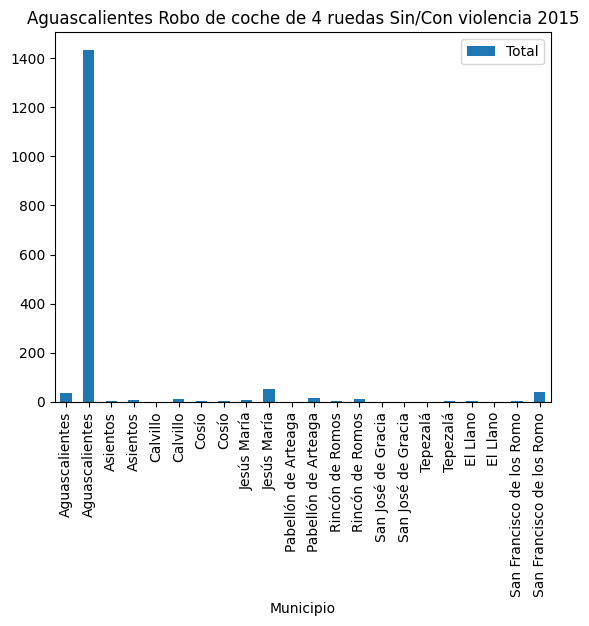

In [ ]:
Aguas.plot(kind='bar',x='Municipio',y='Total', title='Aguascalientes Robo de coche de 4 ruedas Sin/Con violencia 2015')

In [ ]:
# Calculamos el total de robo de autos en aguascalientes
total_Aguas_2015 = Aguas['Total'].sum()
total_Aguas_2015

1641

In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2015 = cocher15.groupby('Entidad')['Total'].sum().reset_index()
totalrc2015.head()

,Entidad,Total
0,Aguascalientes,1641
1,Baja California,14138
2,Baja California Sur,1157
3,Campeche,73
4,Chiapas,1488


In [ ]:
totalrc2015.shape

(32, 2)

<Axes: title={'center': 'Total Robo de coche de 4 ruedas Sin/Con violencia 2015'}, xlabel='Entidad'>

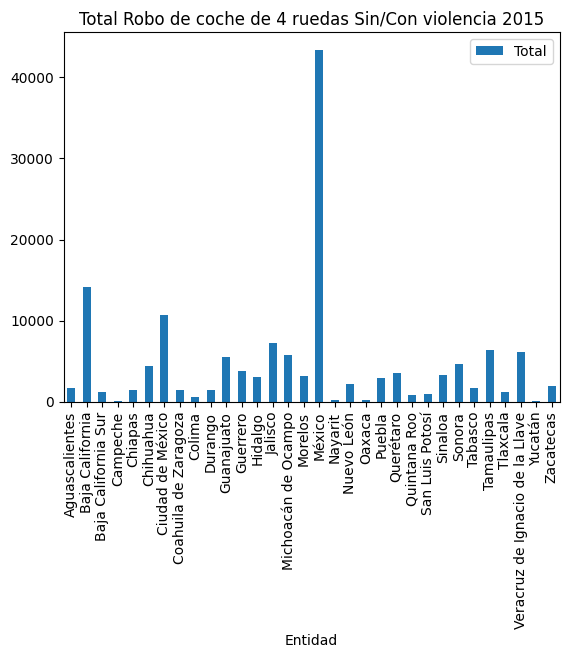

In [ ]:
totalrc2015.plot(kind='bar',x='Entidad',y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2015')

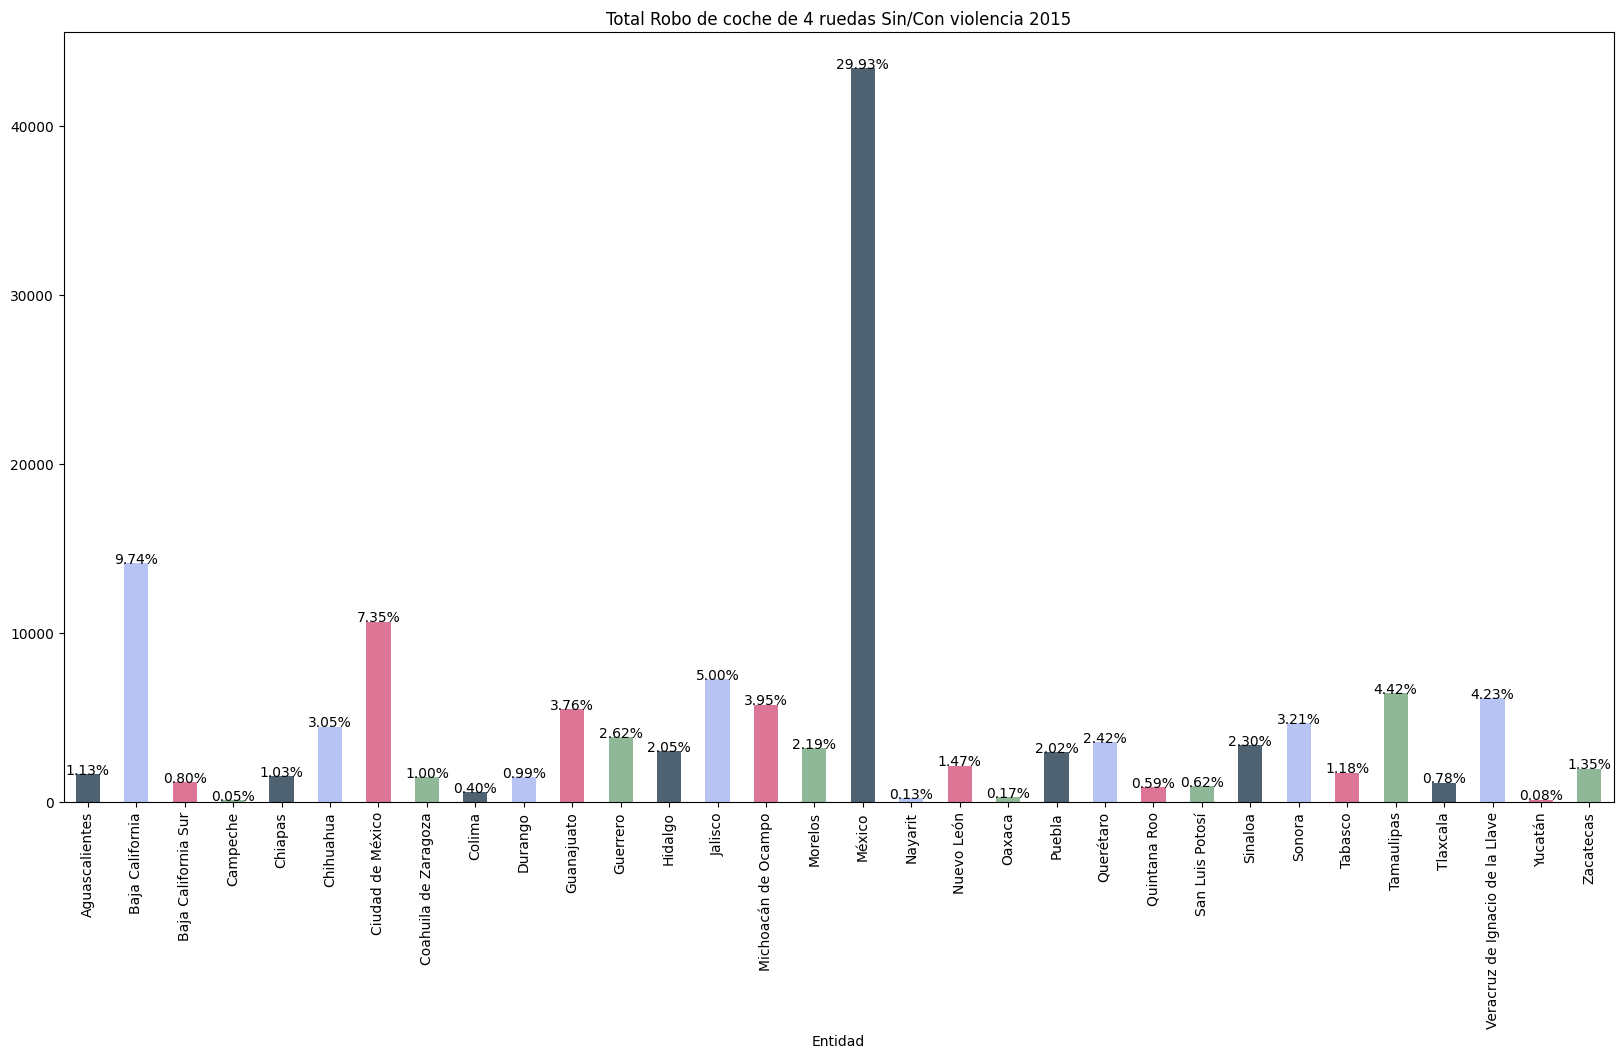

In [ ]:
# Calcular los porcentajes
total = sum(totalrc2015['Total'])
totalrc2015['Porcentaje'] = 100 * totalrc2015['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2015.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2015', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2015['Porcentaje']):
    ax.text(i, totalrc2015['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

In [ ]:
totalrc2015.loc[totalrc2015['Entidad'] == 'México']

,Entidad,Total,Porcentaje
16,México,43431,29.928883


# Datos 2016

In [ ]:
df2016 = pd.read_excel('/content/gdrive/MyDrive/ASE/2016.xlsx')
df2016.info()
df2016.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189238 entries, 0 to 189237
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     189238 non-null  int64 
 1   Clave_Ent               189238 non-null  int64 
 2   Entidad                 189238 non-null  object
 3   Cve. Municipio          189238 non-null  int64 
 4   Municipio               189238 non-null  object
 5   Bien jurídico afectado  189238 non-null  object
 6   Tipo de delito          189238 non-null  object
 7   Subtipo de delito       189238 non-null  object
 8   Modalidad               189238 non-null  object
 9   Enero                   189238 non-null  int64 
 10  Febrero                 189238 non-null  int64 
 11  Marzo                   189238 non-null  int64 
 12  Abril                   189238 non-null  int64 
 13  Mayo                    189238 non-null  int64 
 14  Junio                   189238 non-n

(189238, 21)

In [ ]:
df2016b = df2016[(df2016['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2016['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2016b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,4,3,1,2,4,3,2,3,5,5
42,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,132,...,180,191,178,158,202,236,188,264,203,254
139,2016,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,0,2,1,1,0,0,0
140,2016,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,1,1,1,0,0,0,2,2,1,1
237,2016,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
print(df2016.shape)
print(df2016b.shape)

(189238, 21)
(3862, 21)


In [ ]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher16 = df2016b.copy()
cocher16.loc[:,'Total'] = df2016b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher16.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,3,1,2,4,3,2,3,5,5,38
42,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,132,...,191,178,158,202,236,188,264,203,254,2336
139,2016,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,2,1,1,0,0,0,5
140,2016,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,1,1,0,0,0,2,2,1,1,11
237,2016,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
cocher16.shape

(3862, 22)

In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2016 = cocher16.groupby('Entidad')['Total'].sum().reset_index()
totalrc2016.head()

,Entidad,Total
0,Aguascalientes,2601
1,Baja California,16628
2,Baja California Sur,1746
3,Campeche,196
4,Chiapas,1813


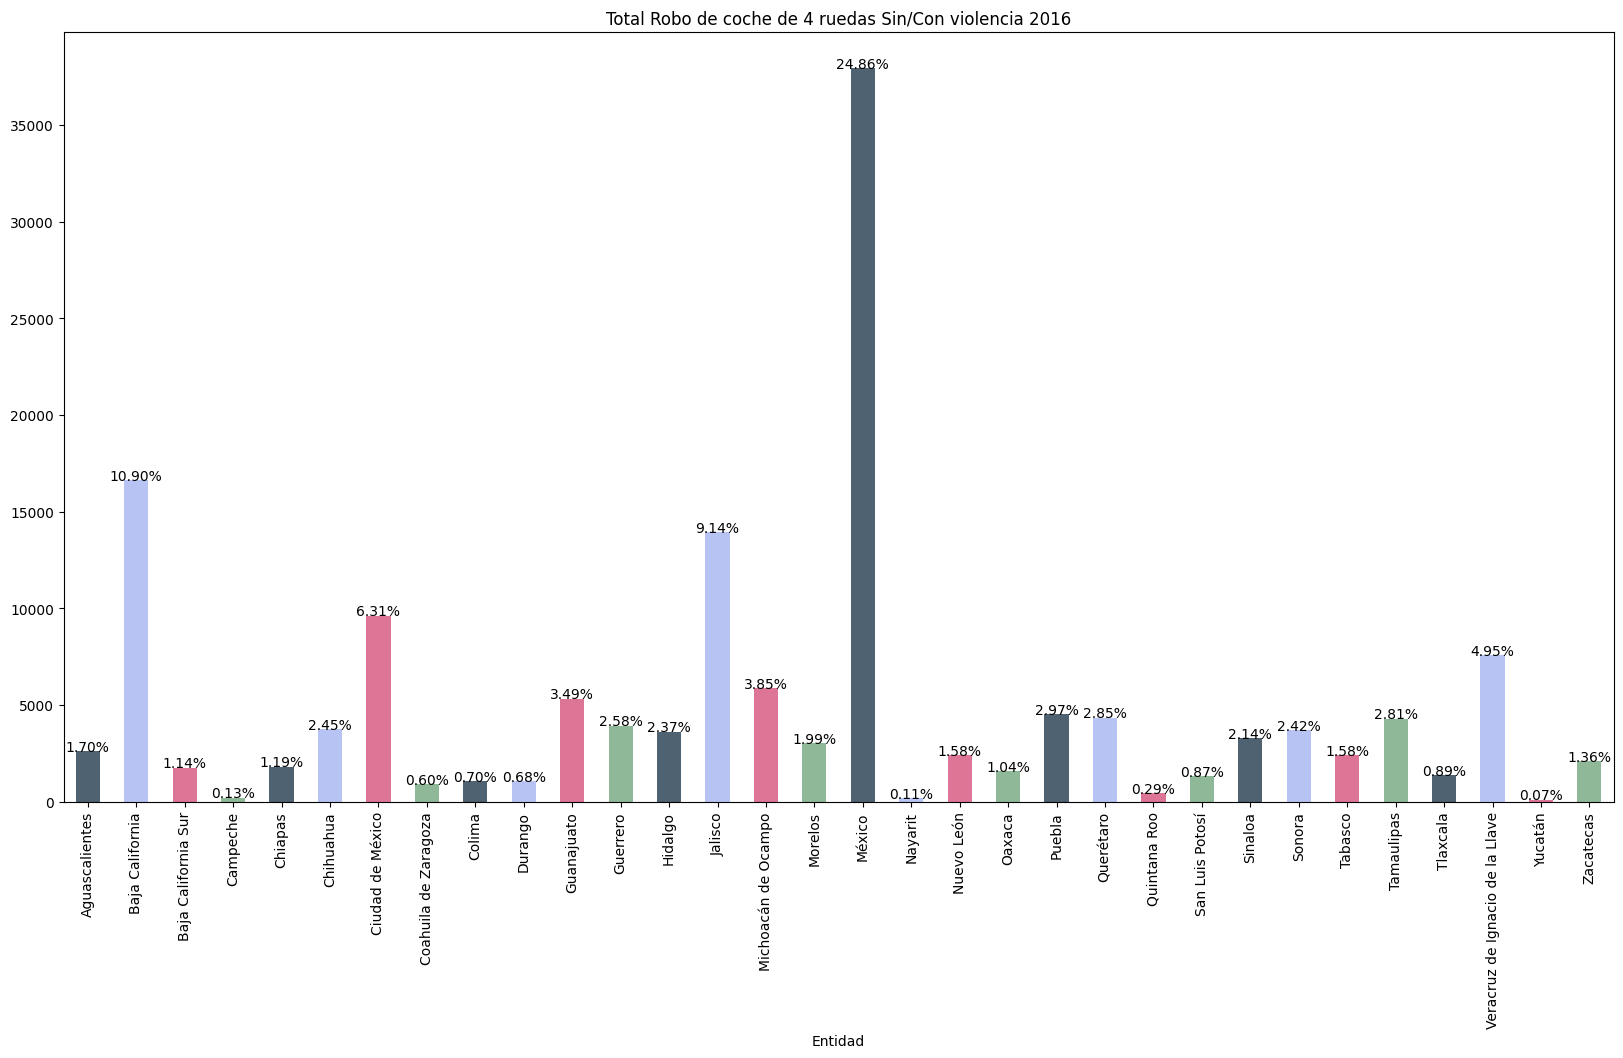

In [ ]:
# Calcular los porcentajes
total = sum(totalrc2016['Total'])
totalrc2016['Porcentaje'] = 100 * totalrc2016['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2016.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2016', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2016['Porcentaje']):
    ax.text(i, totalrc2016['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

#Datos 2017

In [ ]:
df2017 = pd.read_excel('/content/gdrive/MyDrive/ASE/2017.xlsx')
df2017.info()
df2017.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241668 entries, 0 to 241667
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     241668 non-null  int64 
 1   Clave_Ent               241668 non-null  int64 
 2   Entidad                 241668 non-null  object
 3   Cve. Municipio          241668 non-null  int64 
 4   Municipio               241668 non-null  object
 5   Bien jurídico afectado  241668 non-null  object
 6   Tipo de delito          241668 non-null  object
 7   Subtipo de delito       241668 non-null  object
 8   Modalidad               241668 non-null  object
 9   Enero                   241668 non-null  int64 
 10  Febrero                 241668 non-null  int64 
 11  Marzo                   241668 non-null  int64 
 12  Abril                   241668 non-null  int64 
 13  Mayo                    241668 non-null  int64 
 14  Junio                   241668 non-n

(241668, 21)

In [ ]:
df2017.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,...,0,2,3,3,0,3,3,3,3,2
1,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,1,0,2,0,1,0,2,0,0
2,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,2,1,4,4,2,1,3,2,1,1
3,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2017b = df2017[(df2017['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2017['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2017b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,4,5,2,5,6,4,4,4,2,5
42,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,217,...,183,183,200,182,181,232,218,230,210,181
139,2017,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,1,0,0,0
140,2017,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,2,2,0,0,1,2,0,0,0,0
237,2017,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,0,1,1,1,0,0,0


In [ ]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher17 = df2017b.copy()
cocher17.loc[:,'Total'] = df2017b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher17.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,5,2,5,6,4,4,4,2,5,46
42,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,217,...,183,200,182,181,232,218,230,210,181,2389
139,2017,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,1,0,0,0,1
140,2017,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,2,0,0,1,2,0,0,0,0,10
237,2017,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,1,1,1,0,0,0,4


In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2017 = cocher17.groupby('Entidad')['Total'].sum().reset_index()
totalrc2017.head()

,Entidad,Total
0,Aguascalientes,2838
1,Baja California,19732
2,Baja California Sur,1412
3,Campeche,159
4,Chiapas,1832


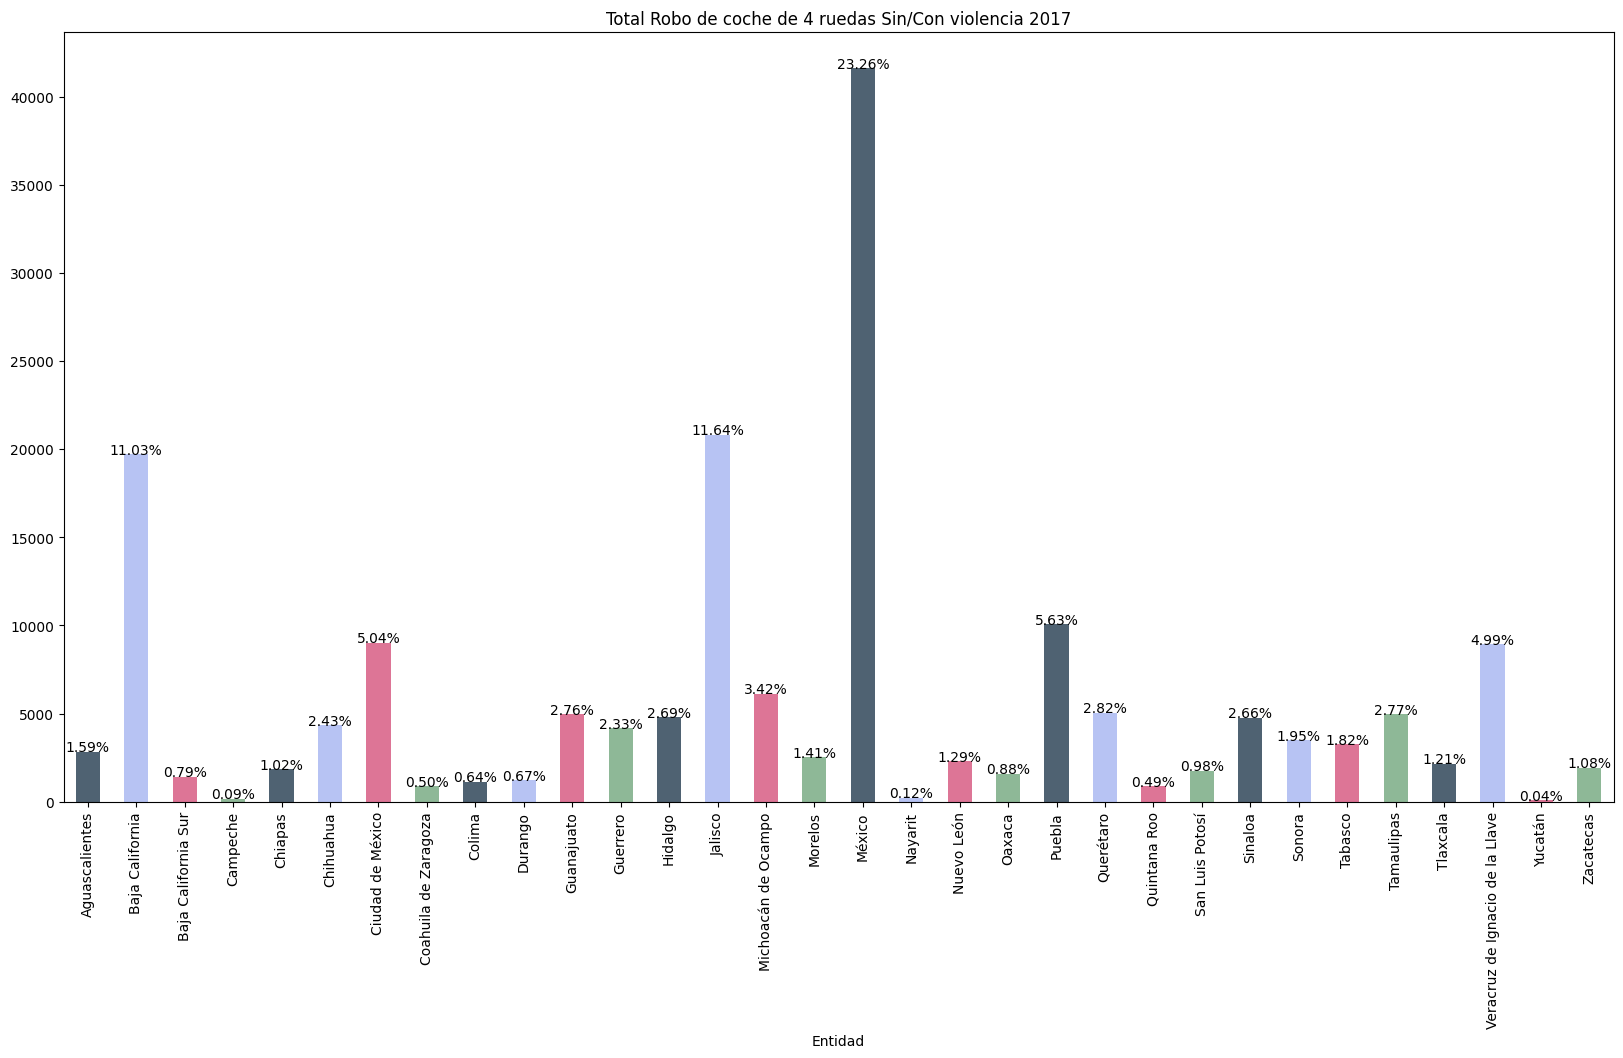

In [ ]:
# Calcular los porcentajes
total = sum(totalrc2017['Total'])
totalrc2017['Porcentaje'] = 100 * totalrc2017['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2017.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2017', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2017['Porcentaje']):
    ax.text(i, totalrc2017['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2018

In [ ]:
df2018 = pd.read_excel('/content/gdrive/MyDrive/ASE/2018.xlsx')
df2018.info()
df2018.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

(242158, 21)

In [ ]:
df2018.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,4,...,3,3,3,1,1,2,4,2,4,3
1,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,1,0,2,0,0,0,1,0,1,0
2,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,2,...,0,2,2,3,0,1,0,1,0,0
3,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,1,0,0,0,0,0,0,0,0
4,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df2018b = df2018[(df2018['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2018['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2018b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,3,...,2,5,6,6,5,8,3,9,3,4
42,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,198,...,188,222,189,169,187,169,133,182,138,132
139,2018,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,1,0,0,0
140,2018,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,2,1,0,0,0,0,1,1,1,0
237,2018,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher18 = df2018b.copy()
cocher18.loc[:,'Total'] = df2018b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher18.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,3,...,5,6,6,5,8,3,9,3,4,62
42,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,198,...,222,189,169,187,169,133,182,138,132,2070
139,2018,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,1,0,0,0,1
140,2018,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,1,0,0,0,0,1,1,1,0,7
237,2018,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,1,0,0,0,0,0,0,3


In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2018 = cocher18.groupby('Entidad')['Total'].sum().reset_index()
totalrc2018.head()

,Entidad,Total
0,Aguascalientes,2523
1,Baja California,15425
2,Baja California Sur,1233
3,Campeche,120
4,Chiapas,1134


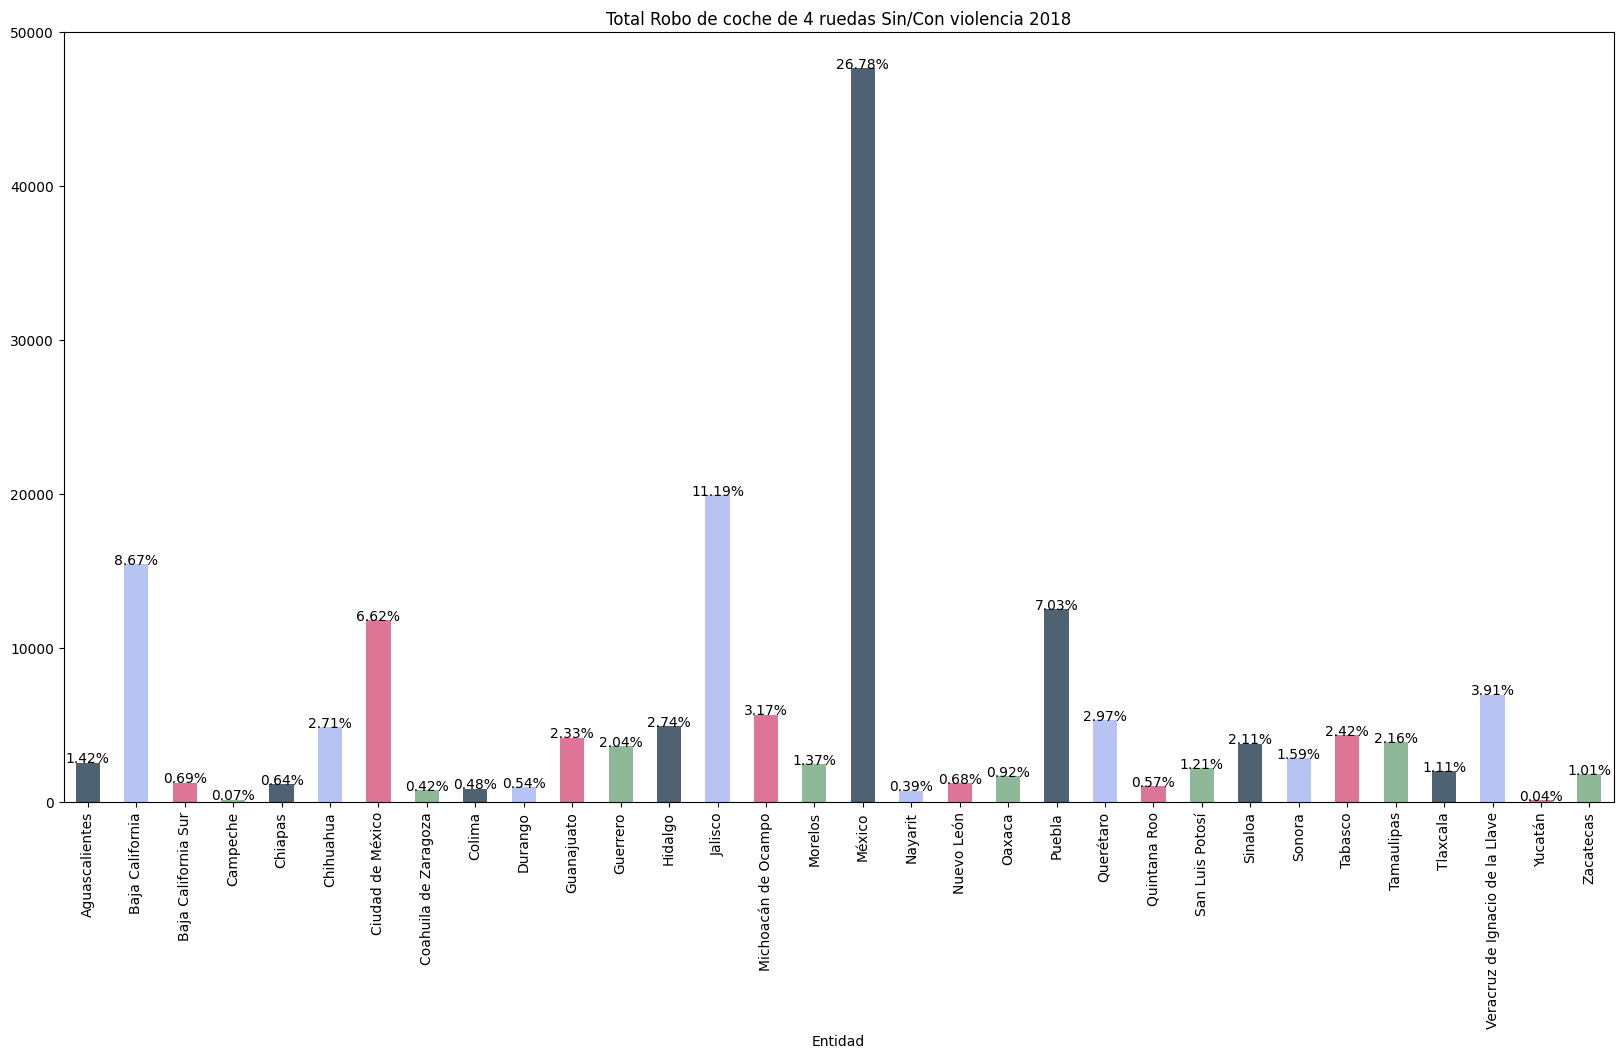

In [ ]:
# Calcular los porcentajes
total = sum(totalrc2018['Total'])
totalrc2018['Porcentaje'] = 100 * totalrc2018['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2018.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2018', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2018['Porcentaje']):
    ax.text(i, totalrc2018['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2019

In [ ]:
df2019 = pd.read_excel('/content/gdrive/MyDrive/ASE/2019.xlsx')
df2019.info()
df2019.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

(242158, 21)

In [ ]:
df2019.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,5,...,2,2,2,4,2,0,7,6,2,1
1,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,2,2,0,1,0,0,0,2,2
2,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,1,...,2,2,1,1,0,0,0,0,1,1
3,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,2,0,0,0,0,0,0,0
4,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df2019b = df2019[(df2019['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2019['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2019b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,7,11,2,3,8,5,3,3,3,3
42,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,146,...,114,100,120,94,68,64,82,87,142,141
139,2019,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,1,2,0,0,1,0,0,0,1,0
140,2019,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,0,2,2,1,0,0,0,1,0,2
237,2019,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df2019b.shape)

(4942, 21)


In [ ]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher19 = df2019b.copy()
cocher19.loc[:,'Total'] = df2019b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher19.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,11,2,3,8,5,3,3,3,3,54
42,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,146,...,100,120,94,68,64,82,87,142,141,1277
139,2019,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,2,0,0,1,0,0,0,1,0,6
140,2019,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,2,2,1,0,0,0,1,0,2,9
237,2019,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2019 = cocher19.groupby('Entidad')['Total'].sum().reset_index()
totalrc2019.head()

,Entidad,Total
0,Aguascalientes,1642
1,Baja California,13412
2,Baja California Sur,761
3,Campeche,153
4,Chiapas,905


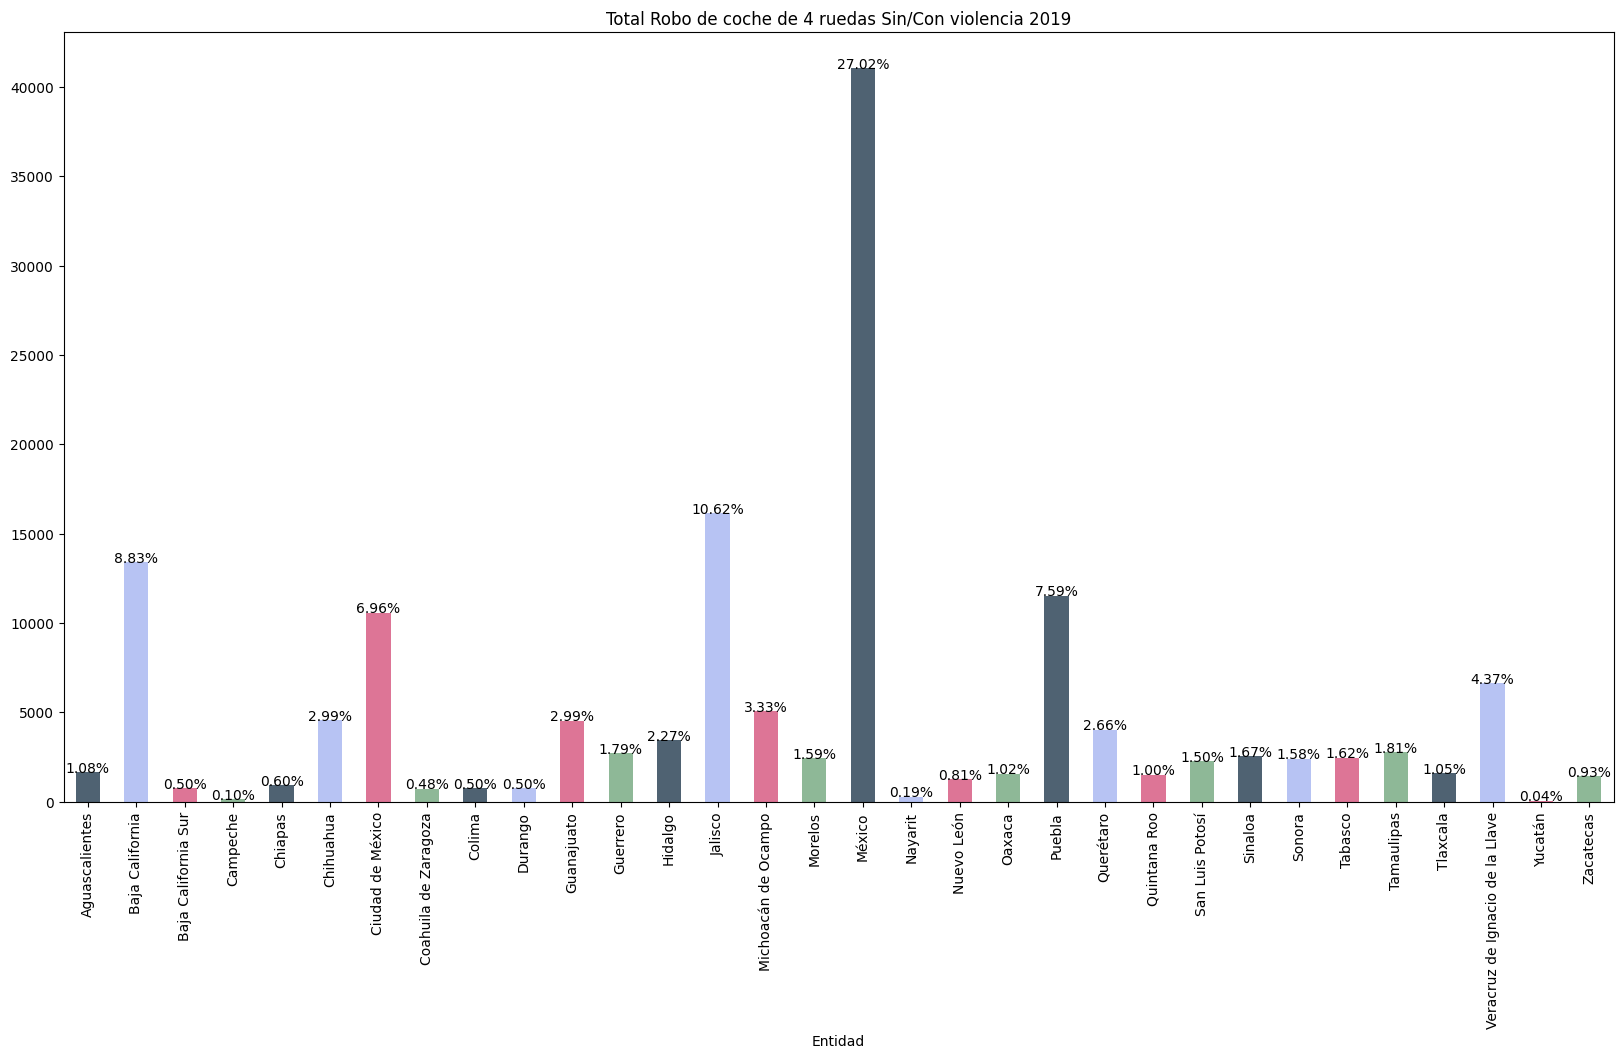

In [ ]:
# Calcular los porcentajes
total = sum(totalrc2019['Total'])
totalrc2019['Porcentaje'] = 100 * totalrc2019['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2019.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2019', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2019['Porcentaje']):
    ax.text(i, totalrc2019['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2020

In [ ]:
df2020 = pd.read_excel('/content/gdrive/MyDrive/ASE/2020.xlsx')
df2020.info()
df2020.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

(242158, 21)

In [ ]:
df2020.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,3,3,2,3,5,2,1,1,1,1
1,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,...,2,0,2,0,1,1,0,0,1,0
2,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,1,...,1,0,2,2,1,2,0,2,0,0
3,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2020b = df2020[(df2020['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2020['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2020b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,4,0,4,3,2,5,2,4,4,2
42,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,98,...,113,80,74,62,66,69,64,59,61,65
139,2020,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,3,0,0,0,0,0,0,0,0
140,2020,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,1,0,1,0,0,0,0,1,1,0
237,2020,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(df2020b.shape)

(4942, 21)


In [ ]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher20 = df2020b.copy()
cocher20.loc[:,'Total'] = df2020b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher20.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,0,4,3,2,5,2,4,4,2,39
42,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,98,...,80,74,62,66,69,64,59,61,65,906
139,2020,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,3,0,0,0,0,0,0,0,0,4
140,2020,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,1,0,0,0,0,1,1,0,4
237,2020,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,0,0,0,1,0,0,2


In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2020 = cocher20.groupby('Entidad')['Total'].sum().reset_index()
totalrc2020.head()

,Entidad,Total
0,Aguascalientes,1106
1,Baja California,9803
2,Baja California Sur,594
3,Campeche,100
4,Chiapas,872


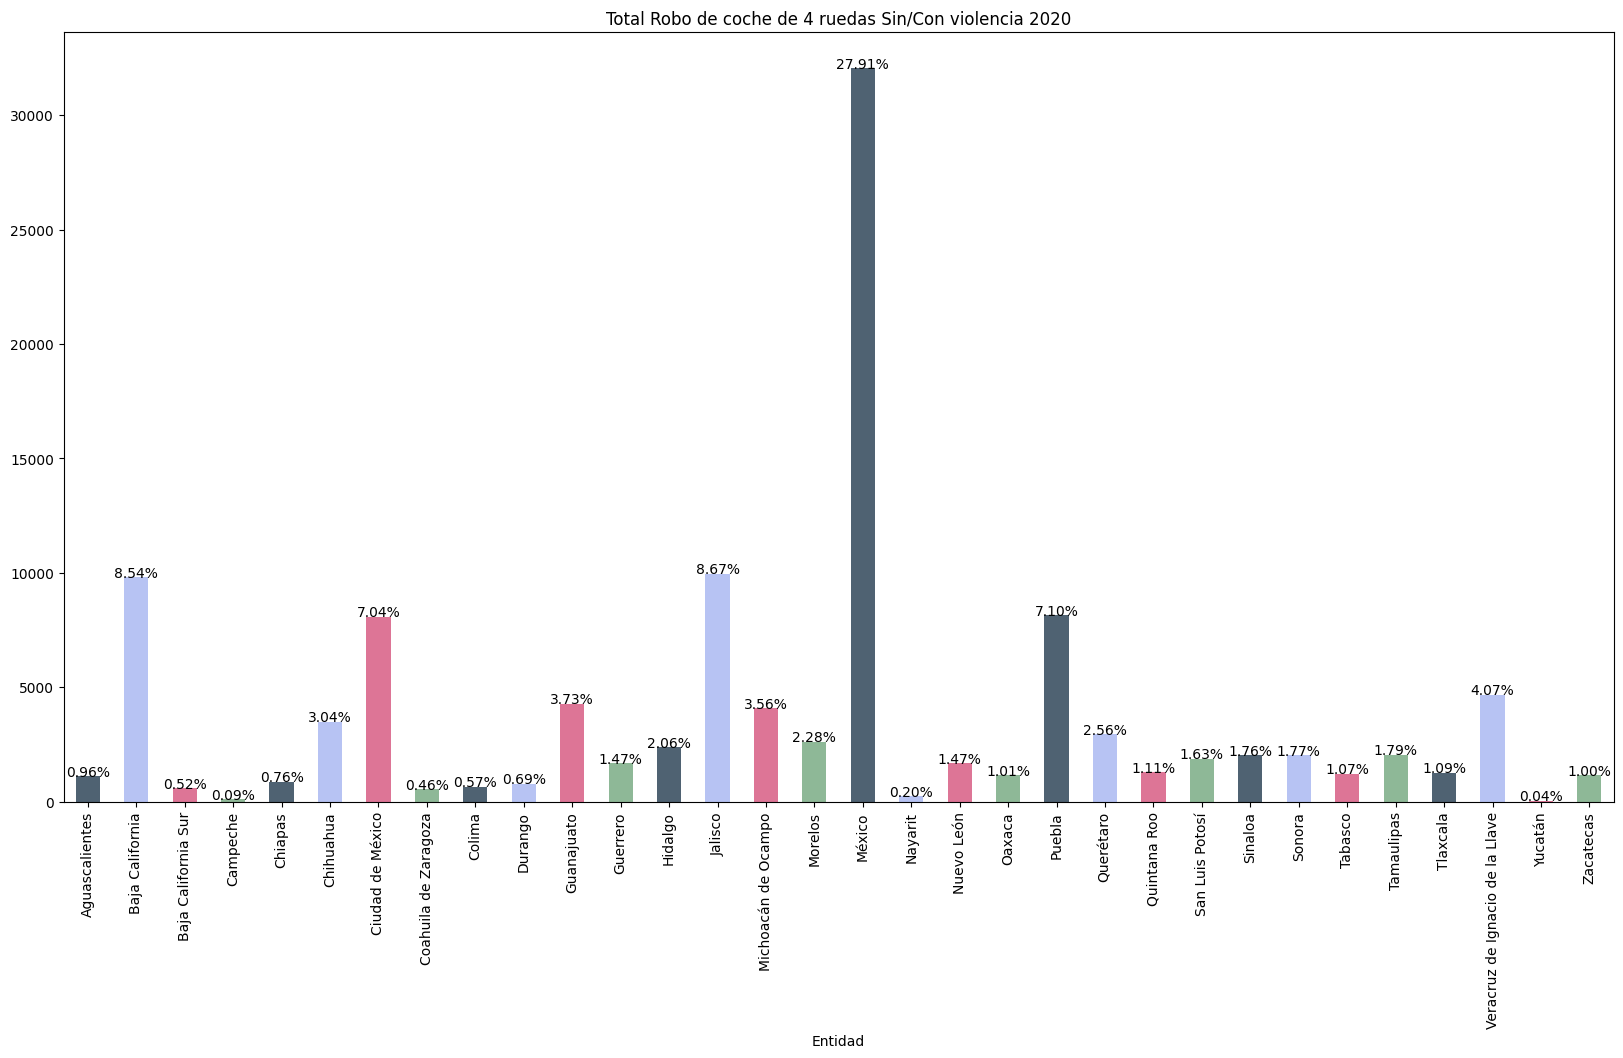

In [ ]:
# Calcular los porcentajes
total = sum(totalrc2020['Total'])
totalrc2020['Porcentaje'] = 100 * totalrc2020['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2020.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2020', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2020['Porcentaje']):
    ax.text(i, totalrc2020['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2021

In [ ]:
df2021 = pd.read_excel('/content/gdrive/MyDrive/ASE/2021.xlsx')
df2021.info()
df2021.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242844 entries, 0 to 242843
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242844 non-null  int64 
 1   Clave_Ent               242844 non-null  int64 
 2   Entidad                 242844 non-null  object
 3   Cve. Municipio          242844 non-null  int64 
 4   Municipio               242844 non-null  object
 5   Bien jurídico afectado  242844 non-null  object
 6   Tipo de delito          242844 non-null  object
 7   Subtipo de delito       242844 non-null  object
 8   Modalidad               242844 non-null  object
 9   Enero                   242844 non-null  int64 
 10  Febrero                 242844 non-null  int64 
 11  Marzo                   242844 non-null  int64 
 12  Abril                   242844 non-null  int64 
 13  Mayo                    242844 non-null  int64 
 14  Junio                   242844 non-n

(242844, 21)

In [ ]:
df2021.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,1,...,2,3,1,1,1,2,2,6,0,1
1,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,...,0,0,0,2,2,1,1,1,0,3
2,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,0,2,1,1,2,1,2,1,1
3,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df2021b = df2021[(df2021['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2021['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2021b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,9,...,2,2,6,1,5,3,2,3,1,5
42,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,58,...,51,46,56,42,50,39,39,48,41,47
139,2021,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,0,0,1,0,1,2,0
140,2021,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,0,0,0,0,1,1,2,1
237,2021,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,1,0,0,0,0,2,1,0,1


In [ ]:
print(df2021b.shape)

(4956, 21)


In [ ]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher21 = df2021b.copy()
cocher21.loc[:,'Total'] = df2021b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher21.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,9,...,2,6,1,5,3,2,3,1,5,47
42,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,58,...,46,56,42,50,39,39,48,41,47,574
139,2021,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,0,1,0,1,2,0,6
140,2021,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,0,0,0,1,1,2,1,6
237,2021,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,1,0,0,0,0,2,1,0,1,5


In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2021 = cocher21.groupby('Entidad')['Total'].sum().reset_index()
totalrc2021.head()

,Entidad,Total
0,Aguascalientes,778
1,Baja California,10875
2,Baja California Sur,402
3,Campeche,76
4,Chiapas,665


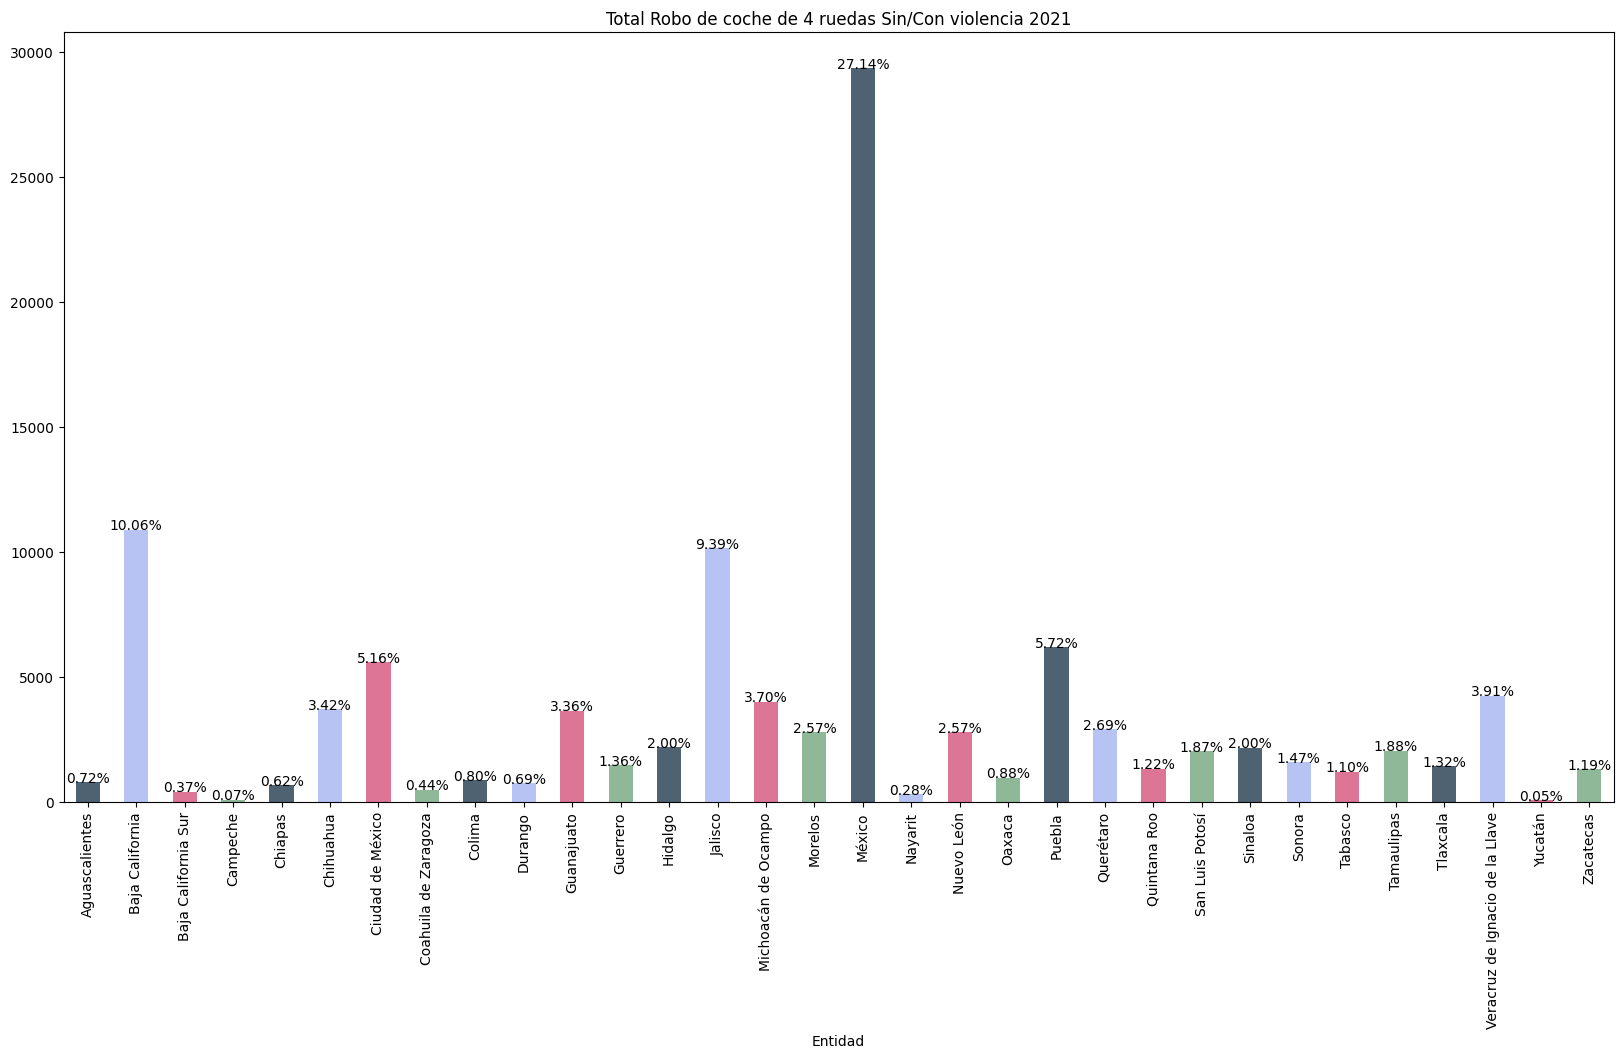

In [ ]:
# Calcular los porcentajes
total = sum(totalrc2021['Total'])
totalrc2021['Porcentaje'] = 100 * totalrc2021['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2021.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2021', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2021['Porcentaje']):
    ax.text(i, totalrc2021['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2022

In [ ]:
df2022 = pd.read_excel('/content/gdrive/MyDrive/ASE/2022.xlsx')
df2022.info()
df2022.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242942 entries, 0 to 242941
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242942 non-null  int64 
 1   Clave_Ent               242942 non-null  int64 
 2   Entidad                 242942 non-null  object
 3   Cve. Municipio          242942 non-null  int64 
 4   Municipio               242942 non-null  object
 5   Bien jurídico afectado  242942 non-null  object
 6   Tipo de delito          242942 non-null  object
 7   Subtipo de delito       242942 non-null  object
 8   Modalidad               242942 non-null  object
 9   Enero                   242942 non-null  int64 
 10  Febrero                 242942 non-null  int64 
 11  Marzo                   242942 non-null  int64 
 12  Abril                   242942 non-null  int64 
 13  Mayo                    242942 non-null  int64 
 14  Junio                   242942 non-n

(242942, 21)

In [ ]:
df2022.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,2,0,0,3,0,2,5,1,1,1
1,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,2,...,1,0,0,2,0,0,1,0,0,0
2,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,0,0,2,0,0,3,1,3,0,1
3,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2022b = df2022[(df2022['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2022['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2022b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,2,3,2,6,2,4,3,2,6,10
42,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,35,...,67,60,39,40,42,45,46,54,31,36
139,2022,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,2,2
140,2022,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,2,0,1,1,0,0,0,0,0,2
237,2022,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,1,1,1,0,0,0,0,1,1,1


In [ ]:
print(df2022b.shape)

(4958, 21)


In [ ]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher22 = df2022b.copy()
cocher22.loc[:,'Total'] = df2022b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher22.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,3,2,6,2,4,3,2,6,10,48
42,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,35,...,60,39,40,42,45,46,54,31,36,540
139,2022,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,2,2,4
140,2022,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,0,1,1,0,0,0,0,0,2,7
237,2022,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,1,1,0,0,0,0,1,1,1,6


In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2022 = cocher22.groupby('Entidad')['Total'].sum().reset_index()
totalrc2022.head()

,Entidad,Total
0,Aguascalientes,791
1,Baja California,11677
2,Baja California Sur,425
3,Campeche,152
4,Chiapas,624


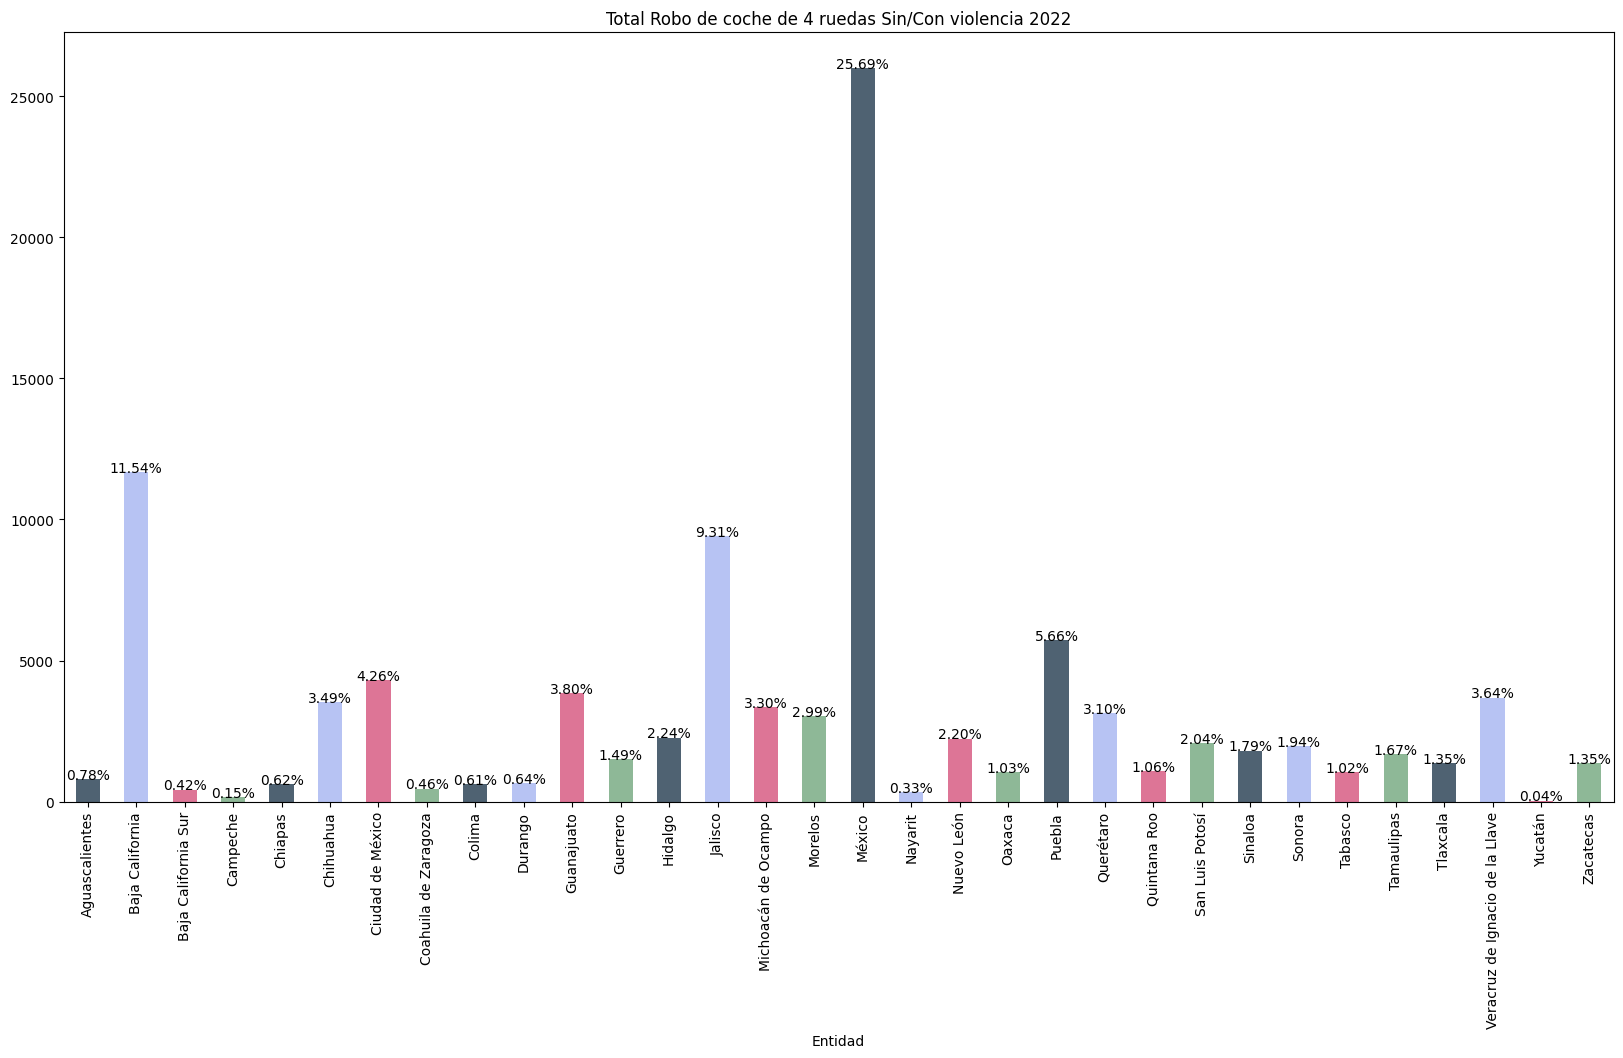

In [ ]:
# Calcular los porcentajes
total = sum(totalrc2022['Total'])
totalrc2022['Porcentaje'] = 100 * totalrc2022['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2022.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2022', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2022['Porcentaje']):
    ax.text(i, totalrc2022['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Cargamos el archivo csv que contiene todos los datos de 2015 a 2022
Para que sea más sencillo manipular los datos


## Anailzamos y limpiamos todos los datos

In [ ]:
dftodo = pd.read_csv('/content/gdrive/MyDrive/ASE/Municipal-Delitos-2015-2022_dic2022.csv', encoding='ISO-8859-1')
dftodo.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0,0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
dftodo.tail()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
1832399,2022,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,0,0,0,0
1832400,2022,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0
1832401,2022,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,0,0,0,0
1832402,2022,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,0,0,0
1832403,2022,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
dftodo.shape

(1832404, 21)

In [ ]:
#Vemos que datos hacen falta
dftodo.isna().sum()

Año                       0
Clave_Ent                 0
Entidad                   0
Cve. Municipio            0
Municipio                 0
Bien jurídico afectado    0
Tipo de delito            0
Subtipo de delito         0
Modalidad                 0
Enero                     0
Febrero                   0
Marzo                     0
Abril                     0
Mayo                      0
Junio                     0
Julio                     0
Agosto                    0
Septiembre                0
Octubre                   0
Noviembre                 0
Diciembre                 0
dtype: int64

In [ ]:
dftodob = dftodo[(dftodo['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (dftodo['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
dftodob.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,4,3,0,1,1,5,2,5,6,4
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,122,124,138,94,89,93,126,105,152,171
139,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,1,0,1
140,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,0,1,2,0,1,1,1,3
237,2015,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df2015b.shape)

(3862, 21)


In [ ]:
dftodob.shape

(37396, 21)

In [ ]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cochertodo = dftodob.copy()
cochertodo.loc[:,'Total'] = dftodob[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cochertodo.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,3,0,1,1,5,2,5,6,4,36
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,124,138,94,89,93,126,105,152,171,1434
139,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,1,0,1,2
140,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,1,2,0,1,1,1,3,9
237,2015,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Hcaemos un df en donde pongamos como fue el total de robo de coches de la república 
totalrctodo = cochertodo.groupby('Año')['Total'].sum().reset_index()
totalrctodo.head()

,Año,Total
0,2015,145114
1,2016,152596
2,2017,178929
3,2018,177987
4,2019,151878


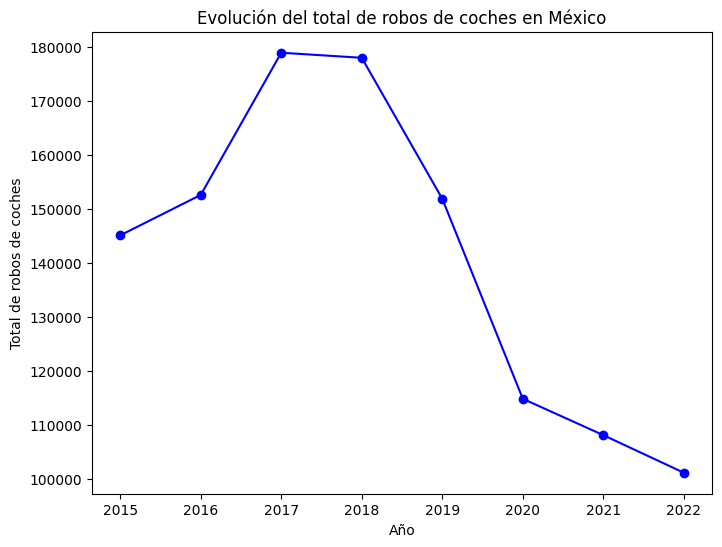

In [ ]:
# Crea una figura
fig = plt.figure(figsize=(8, 6))

# Crea un gráfico de línea
plt.plot(totalrctodo['Año'], totalrctodo['Total'], linestyle='-', color='blue', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en México')

# Muestra el gráfico
plt.show()

In [ ]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=totalrctodo['Año'], y=totalrctodo['Total'], mode='lines+markers', line=dict(color='mediumturquoise'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en México', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

## Vamos a sacar y analizar los estados con menor y mayor número de robos desde 2015 a 2022

In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrctodoent = cochertodo.groupby('Entidad')['Total'].sum().reset_index()
totalrctodoent.head()

,Entidad,Total
0,Aguascalientes,13920
1,Baja California,111690
2,Baja California Sur,7730
3,Campeche,1029
4,Chiapas,9333


In [ ]:
# Sacamos los estados que tuvieron mayores robos de 2015 al 2022
tres_estados_mas_robados = totalrctodoent.nlargest(3, 'Total')
tres_estados_mas_robados.head()

,Entidad,Total
16,México,299073
1,Baja California,111690
13,Jalisco,107595


In [ ]:
# Sacamos los estados que tuvieron menor número de robos de 2015 al 2022
tres_estados_menos_robados = totalrctodoent.nsmallest(3, 'Total')
tres_estados_menos_robados

,Entidad,Total
30,Yucatán,555
3,Campeche,1029
17,Nayarit,2425


###Estados con mayor número de robos

####Estado de México

In [ ]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
em = cochertodo.loc[(cochertodo['Entidad'] == 'México')]
em.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
64525,2015,15,México,15001,Acambay de Ruíz Castañeda,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,0,1,0,0,2,0,0,3,0,9
64526,2015,15,México,15001,Acambay de Ruíz Castañeda,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,3,...,1,2,2,0,1,7,0,2,0,25
64623,2015,15,México,15002,Acolman,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,18,...,7,10,11,6,8,9,13,9,8,129
64624,2015,15,México,15002,Acolman,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,24,...,11,12,15,16,19,21,14,15,22,198
64721,2015,15,México,15003,Aculco,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,2,1,1,0,0,0,2,2,0,9


In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
emtodo = em.groupby('Año')['Total'].sum().reset_index()
emtodo.head()

,Año,Total
0,2015,43431
1,2016,37932
2,2017,41625
3,2018,47657
4,2019,41042


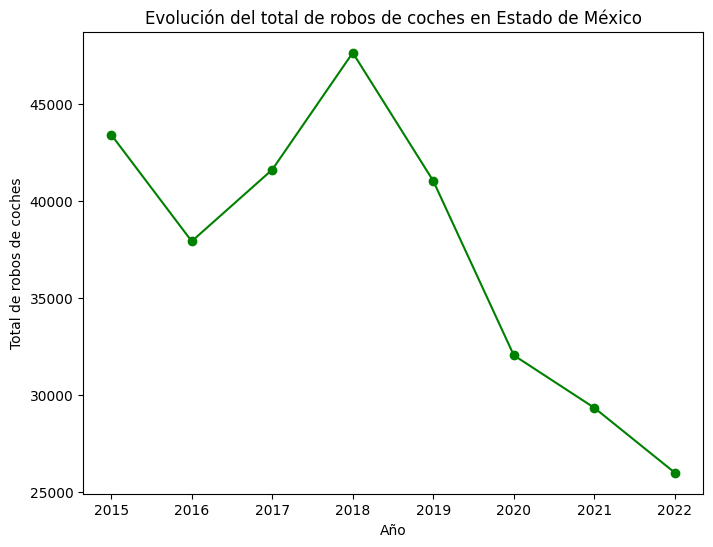

In [ ]:
# Crea una figura
fig = plt.figure(figsize=(8, 6))

# Crea un gráfico de línea
plt.plot(emtodo['Año'], emtodo['Total'], linestyle='-', color='green', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en Estado de México')

# Muestra el gráfico
plt.show()

In [ ]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=emtodo['Año'], y=emtodo['Total'], mode='lines+markers', line=dict(color='orange'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Estado de México', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)


In [ ]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmunem = cochertodo.loc[cochertodo['Entidad'] == 'México', ['Municipio','Modalidad', 'Total']].copy()
rcmunem.head()

,Municipio,Modalidad,Total
64525,Acambay de Ruíz Castañeda,Robo de coche de 4 ruedas Con violencia,9
64526,Acambay de Ruíz Castañeda,Robo de coche de 4 ruedas Sin violencia,25
64623,Acolman,Robo de coche de 4 ruedas Con violencia,129
64624,Acolman,Robo de coche de 4 ruedas Sin violencia,198
64721,Aculco,Robo de coche de 4 ruedas Con violencia,9


In [ ]:
total_rcmunem = rcmunem.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmunem.head()

,Municipio,Total
0,Acambay de Ruíz Castañeda,350
1,Acolman,2479
2,Aculco,254
3,Almoloya de Alquisiras,35
4,Almoloya de Juárez,1297


<ipython-input-217-ccdcd3384ff6>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



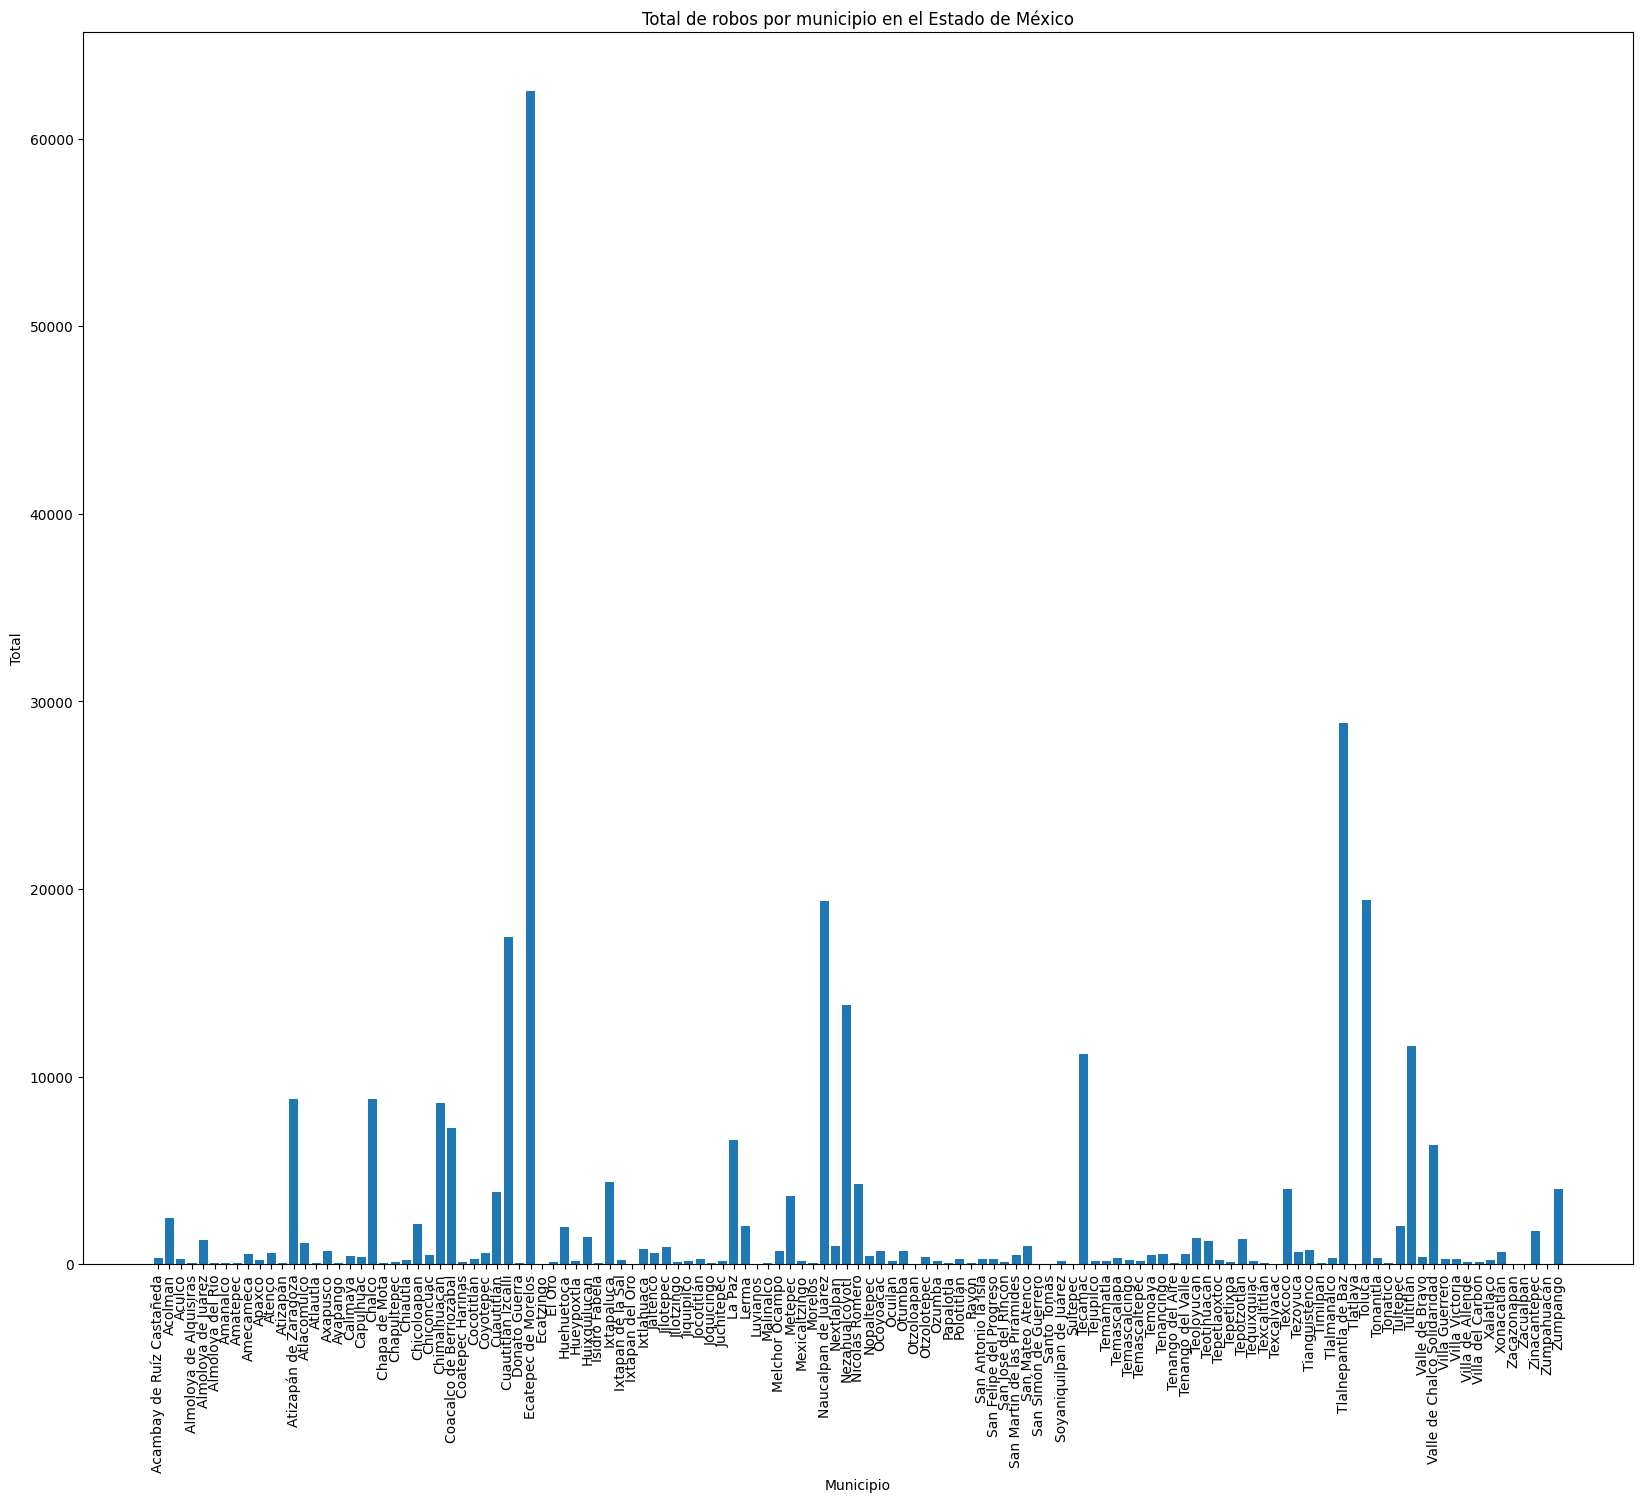

In [ ]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20,16))

# Crear un gráfico de barras
ax.bar(total_rcmunem['Municipio'], total_rcmunem['Total'])

# Ajustar las etiquetas del eje x
ax.set_xticklabels(total_rcmunem['Municipio'], rotation=90)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en el Estado de México')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

####Baja California

In [ ]:
# Hacemos un df en donde tenga todo lo relacionado con Baja California
bc = cochertodo.loc[(cochertodo['Entidad'] == 'Baja California')]
bc.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
1119,2015,2,Baja California,2001,Ensenada,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
1120,2015,2,Baja California,2001,Ensenada,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,129,...,117,125,114,142,111,120,170,144,136,1477
1217,2015,2,Baja California,2002,Mexicali,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,38,...,22,22,31,32,31,31,25,33,30,342
1218,2015,2,Baja California,2002,Mexicali,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,357,...,404,400,450,430,392,443,511,523,448,5119
1315,2015,2,Baja California,2003,Tecate,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,1,1,2


In [ ]:
# Hacemos un df en donde tengamos el total de Baja California y poder graficar
bctodo = bc.groupby('Año')['Total'].sum().reset_index()
bctodo.head()

,Año,Total
0,2015,14138
1,2016,16628
2,2017,19732
3,2018,15425
4,2019,13412


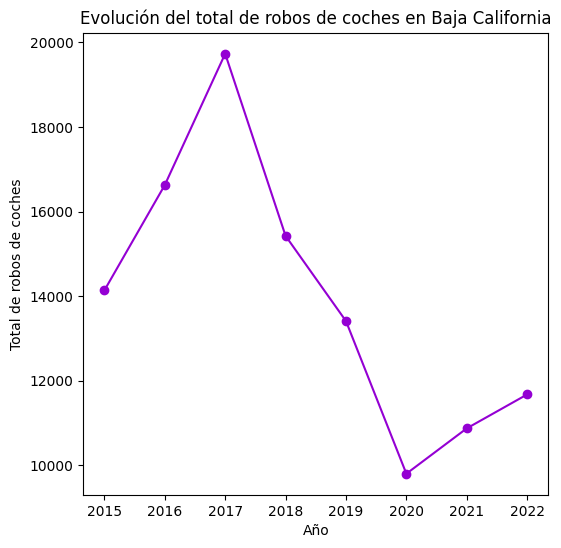

In [ ]:
# Crea una figura
fig = plt.figure(figsize=(6, 6))

# Crea un gráfico de línea
plt.plot(bctodo['Año'], bctodo['Total'], linestyle='-', color='darkviolet', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en Baja California')

# Muestra el gráfico
plt.show()


In [ ]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=bctodo['Año'], y=bctodo['Total'], mode='lines+markers', line=dict(color='darkviolet'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Baja California', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [ ]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmunbc = cochertodo.loc[cochertodo['Entidad'] == 'Baja California', ['Municipio','Modalidad', 'Total']].copy()
rcmunbc.head()

,Municipio,Modalidad,Total
1119,Ensenada,Robo de coche de 4 ruedas Con violencia,0
1120,Ensenada,Robo de coche de 4 ruedas Sin violencia,1477
1217,Mexicali,Robo de coche de 4 ruedas Con violencia,342
1218,Mexicali,Robo de coche de 4 ruedas Sin violencia,5119
1315,Tecate,Robo de coche de 4 ruedas Con violencia,2


In [ ]:
total_rcmunbc = rcmunbc.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmunbc.head()

,Municipio,Total
0,Ensenada,14141
1,Mexicali,28497
2,Playas de Rosarito,5507
3,San Felipe,33
4,San Quintín,120


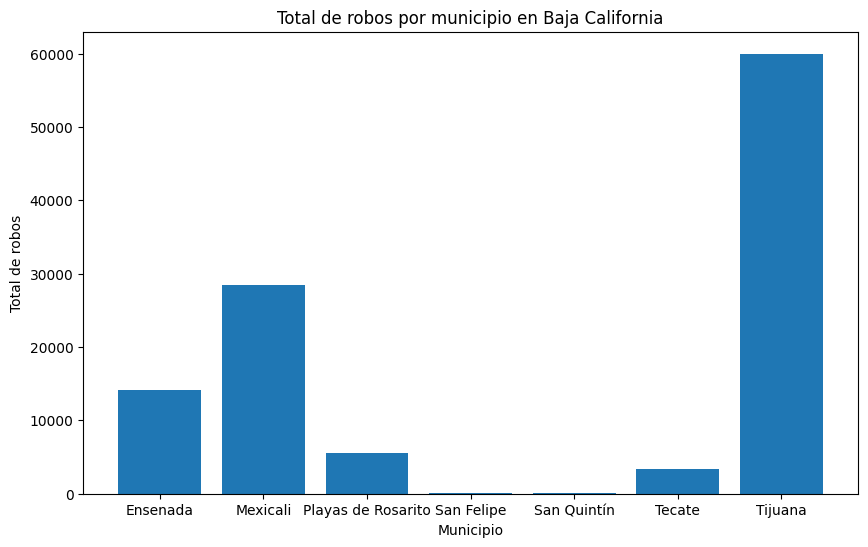

In [ ]:
# Obtener los datos a graficar
data = total_rcmunbc['Total']
labels = total_rcmunbc['Municipio']

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, data)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en Baja California')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total de robos')

# Mostrar el gráfico
plt.show()

####Jalisco

In [ ]:
# Hacemos un df en donde tenga todo lo relacionado con Jalisco
j = cochertodo.loc[(cochertodo['Entidad'] == 'Jalisco')]
j.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
52177,2015,14,Jalisco,14001,Acatic,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,1,0,1
52178,2015,14,Jalisco,14001,Acatic,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,1,0,0,1,3,0,1,1,1,8
52275,2015,14,Jalisco,14002,Acatlán de Juárez,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,2
52276,2015,14,Jalisco,14002,Acatlán de Juárez,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,1,1,1,0,1,0,1,2,1,13
52373,2015,14,Jalisco,14003,Ahualulco de Mercado,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,1,0,1,2,2,0,6


In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
jtodo = j.groupby('Año')['Total'].sum().reset_index()
jtodo.head()

,Año,Total
0,2015,7253
1,2016,13943
2,2017,20833
3,2018,19910
4,2019,16137


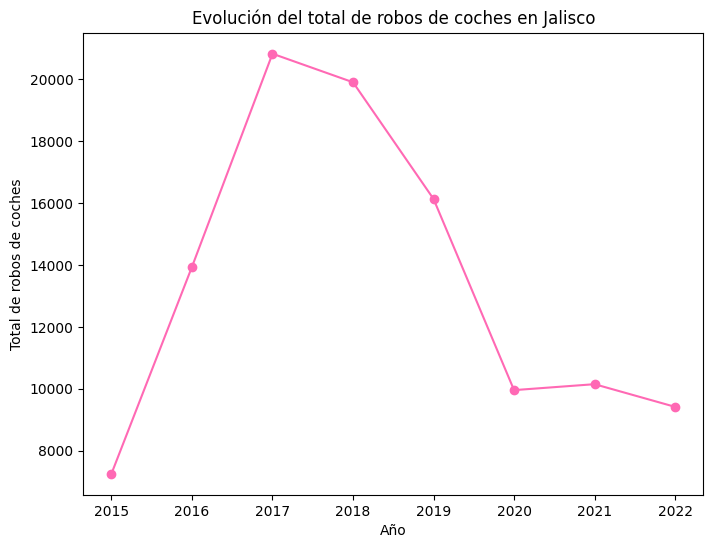

In [ ]:
# Crea una figura
fig = plt.figure(figsize=(8, 6))

# Crea un gráfico de línea
plt.plot(jtodo['Año'], jtodo['Total'], linestyle='-', color='hotpink', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en Jalisco')

# Muestra el gráfico
plt.show()

In [ ]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=jtodo['Año'], y=jtodo['Total'], mode='lines+markers', line=dict(color='hotpink'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Jalisco', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [ ]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmunj = cochertodo.loc[cochertodo['Entidad'] == 'Jalisco', ['Municipio','Modalidad', 'Total']].copy()
rcmunj.head()

,Municipio,Modalidad,Total
52177,Acatic,Robo de coche de 4 ruedas Con violencia,1
52178,Acatic,Robo de coche de 4 ruedas Sin violencia,8
52275,Acatlán de Juárez,Robo de coche de 4 ruedas Con violencia,2
52276,Acatlán de Juárez,Robo de coche de 4 ruedas Sin violencia,13
52373,Ahualulco de Mercado,Robo de coche de 4 ruedas Con violencia,6


In [ ]:
total_rcmunj = rcmunj.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmunj.head()

,Municipio,Total
0,Acatic,108
1,Acatlán de Juárez,186
2,Ahualulco de Mercado,82
3,Amacueca,13
4,Amatitán,78


<ipython-input-231-f2f87e9129fd>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



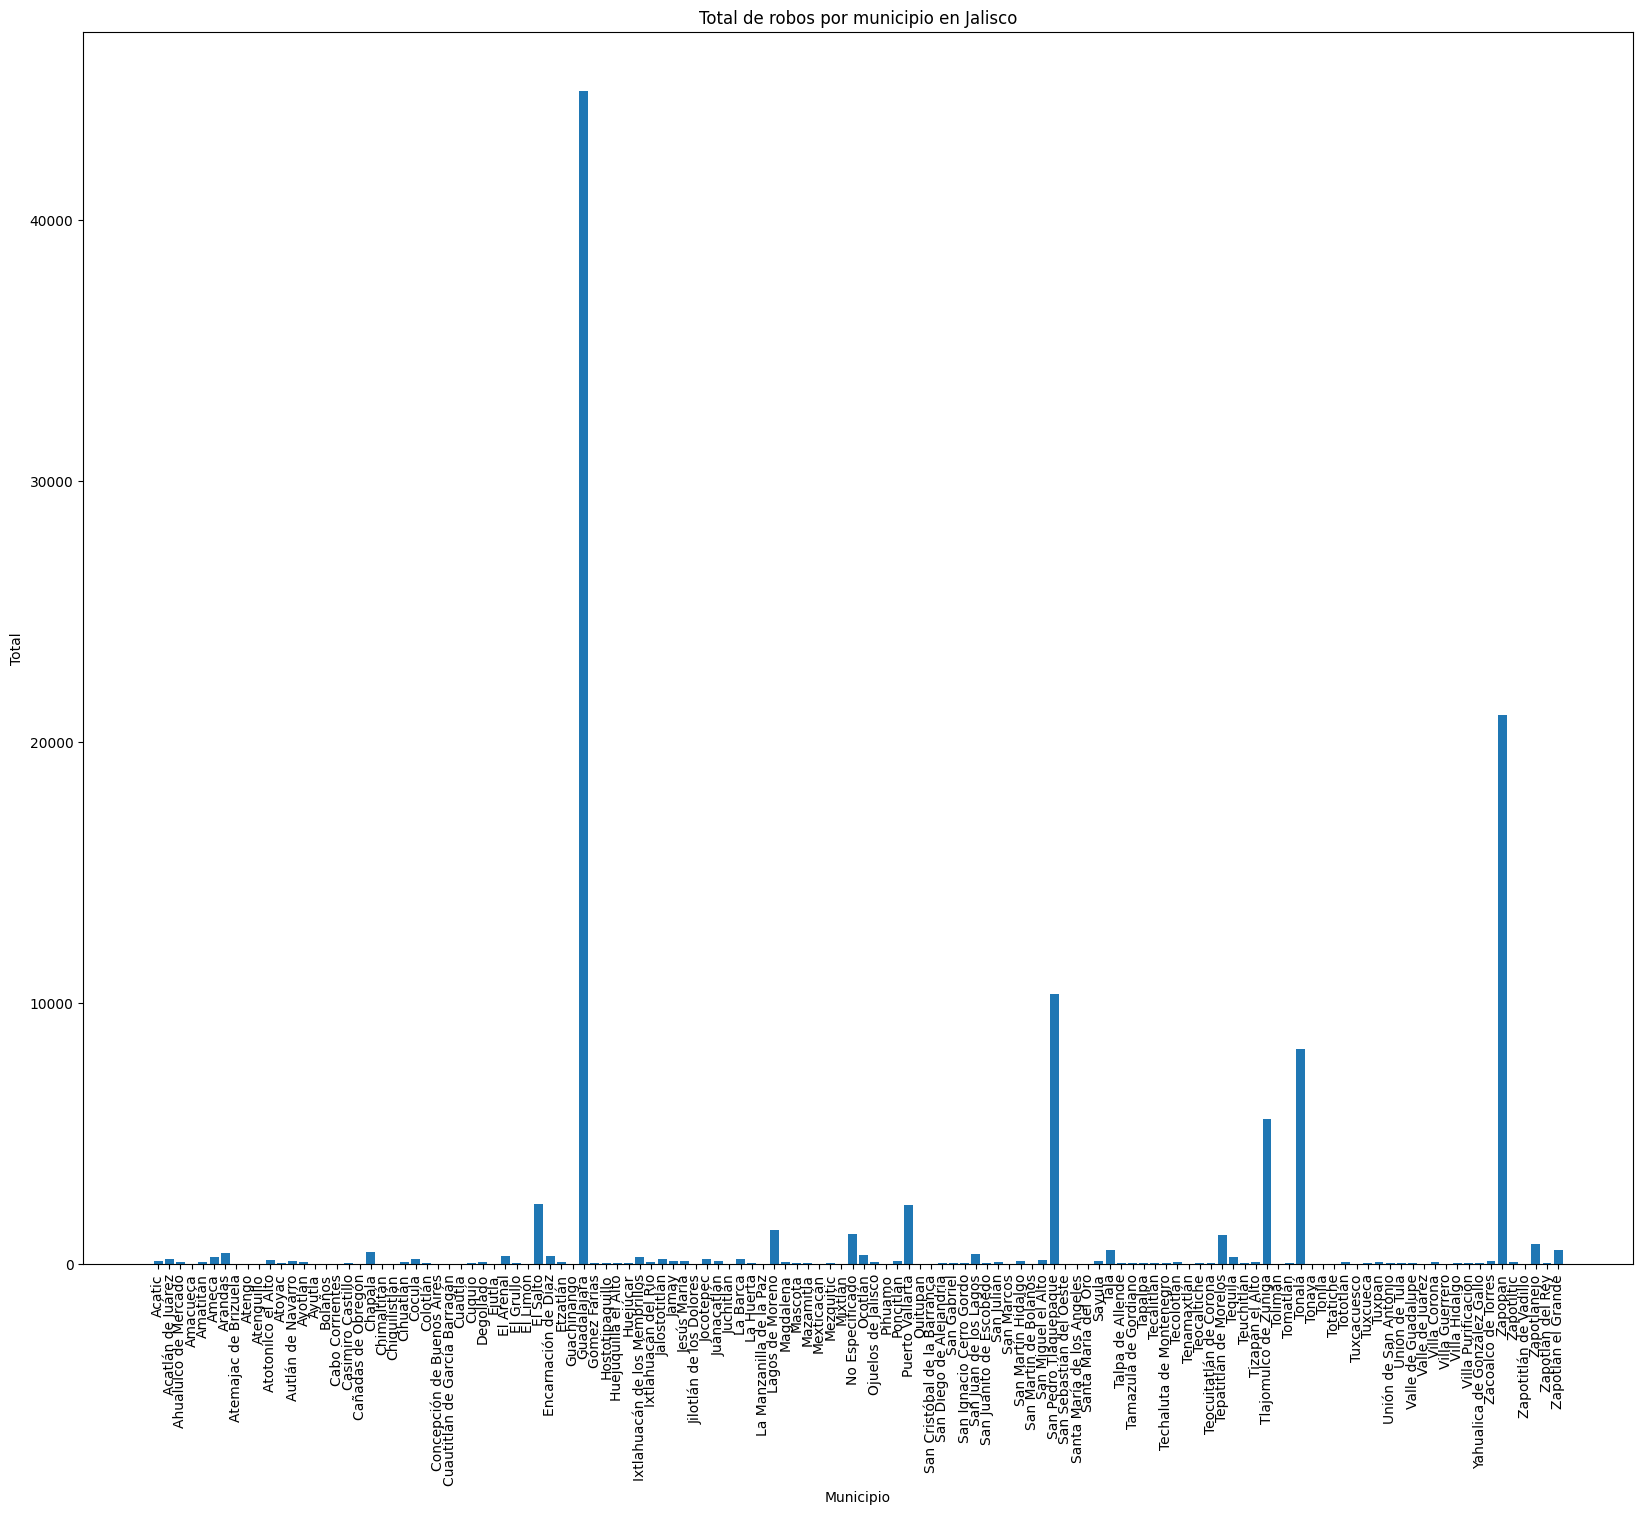

In [ ]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20,16))

# Crear un gráfico de barras
ax.bar(total_rcmunj['Municipio'], total_rcmunj['Total'])

# Ajustar las etiquetas del eje x
ax.set_xticklabels(total_rcmunj['Municipio'], rotation=90)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en Jalisco')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

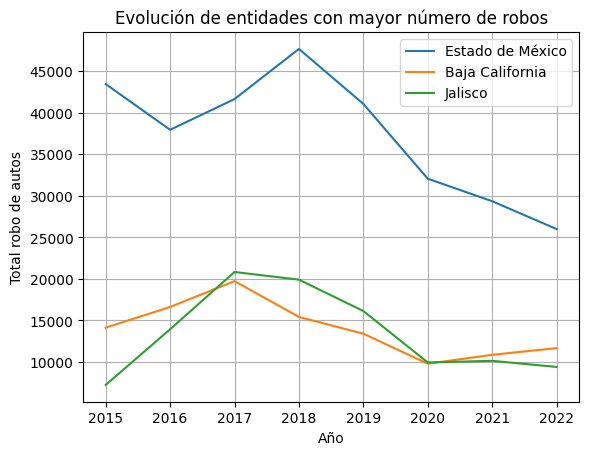

In [ ]:
plt.plot(emtodo['Año'], emtodo['Total'], label='Estado de México')
plt.plot(bctodo['Año'], bctodo['Total'], label='Baja California')
plt.plot(jtodo['Año'], jtodo['Total'], label='Jalisco')
plt.xlabel('Año')
plt.ylabel('Total robo de autos')
plt.title('Evolución de entidades con mayor número de robos')
plt.grid(True)
plt.legend()

###Estados con menor número de robos

####Yucatán

In [ ]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
y = cochertodo.loc[(cochertodo['Entidad'] == 'Yucatán')]
y.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
173207,2015,31,Yucatán,31001,Abalá,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
173208,2015,31,Yucatán,31001,Abalá,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,0,0,0,0,0,0,0,0
173305,2015,31,Yucatán,31002,Acanceh,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
173306,2015,31,Yucatán,31002,Acanceh,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,0,0,0,0,0,0,0,0
173403,2015,31,Yucatán,31003,Akil,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
ytodo = y.groupby('Año')['Total'].sum().reset_index()
ytodo.head()

,Año,Total
0,2015,117
1,2016,105
2,2017,70
3,2018,75
4,2019,59


In [ ]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=ytodo['Año'], y=ytodo['Total'], mode='lines+markers', line=dict(color='tomato'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Yucatán', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [ ]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmuny = cochertodo.loc[cochertodo['Entidad'] == 'Yucatán', ['Municipio','Modalidad', 'Total']].copy()
rcmuny.head()

,Municipio,Modalidad,Total
173207,Abalá,Robo de coche de 4 ruedas Con violencia,0
173208,Abalá,Robo de coche de 4 ruedas Sin violencia,0
173305,Acanceh,Robo de coche de 4 ruedas Con violencia,0
173306,Acanceh,Robo de coche de 4 ruedas Sin violencia,0
173403,Akil,Robo de coche de 4 ruedas Con violencia,0


In [ ]:
total_rcmuny = rcmuny.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmuny.head()

,Municipio,Total
0,Abalá,0
1,Acanceh,0
2,Akil,0
3,Baca,0
4,Bokobá,0


<ipython-input-238-8b9ff900c7b6>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



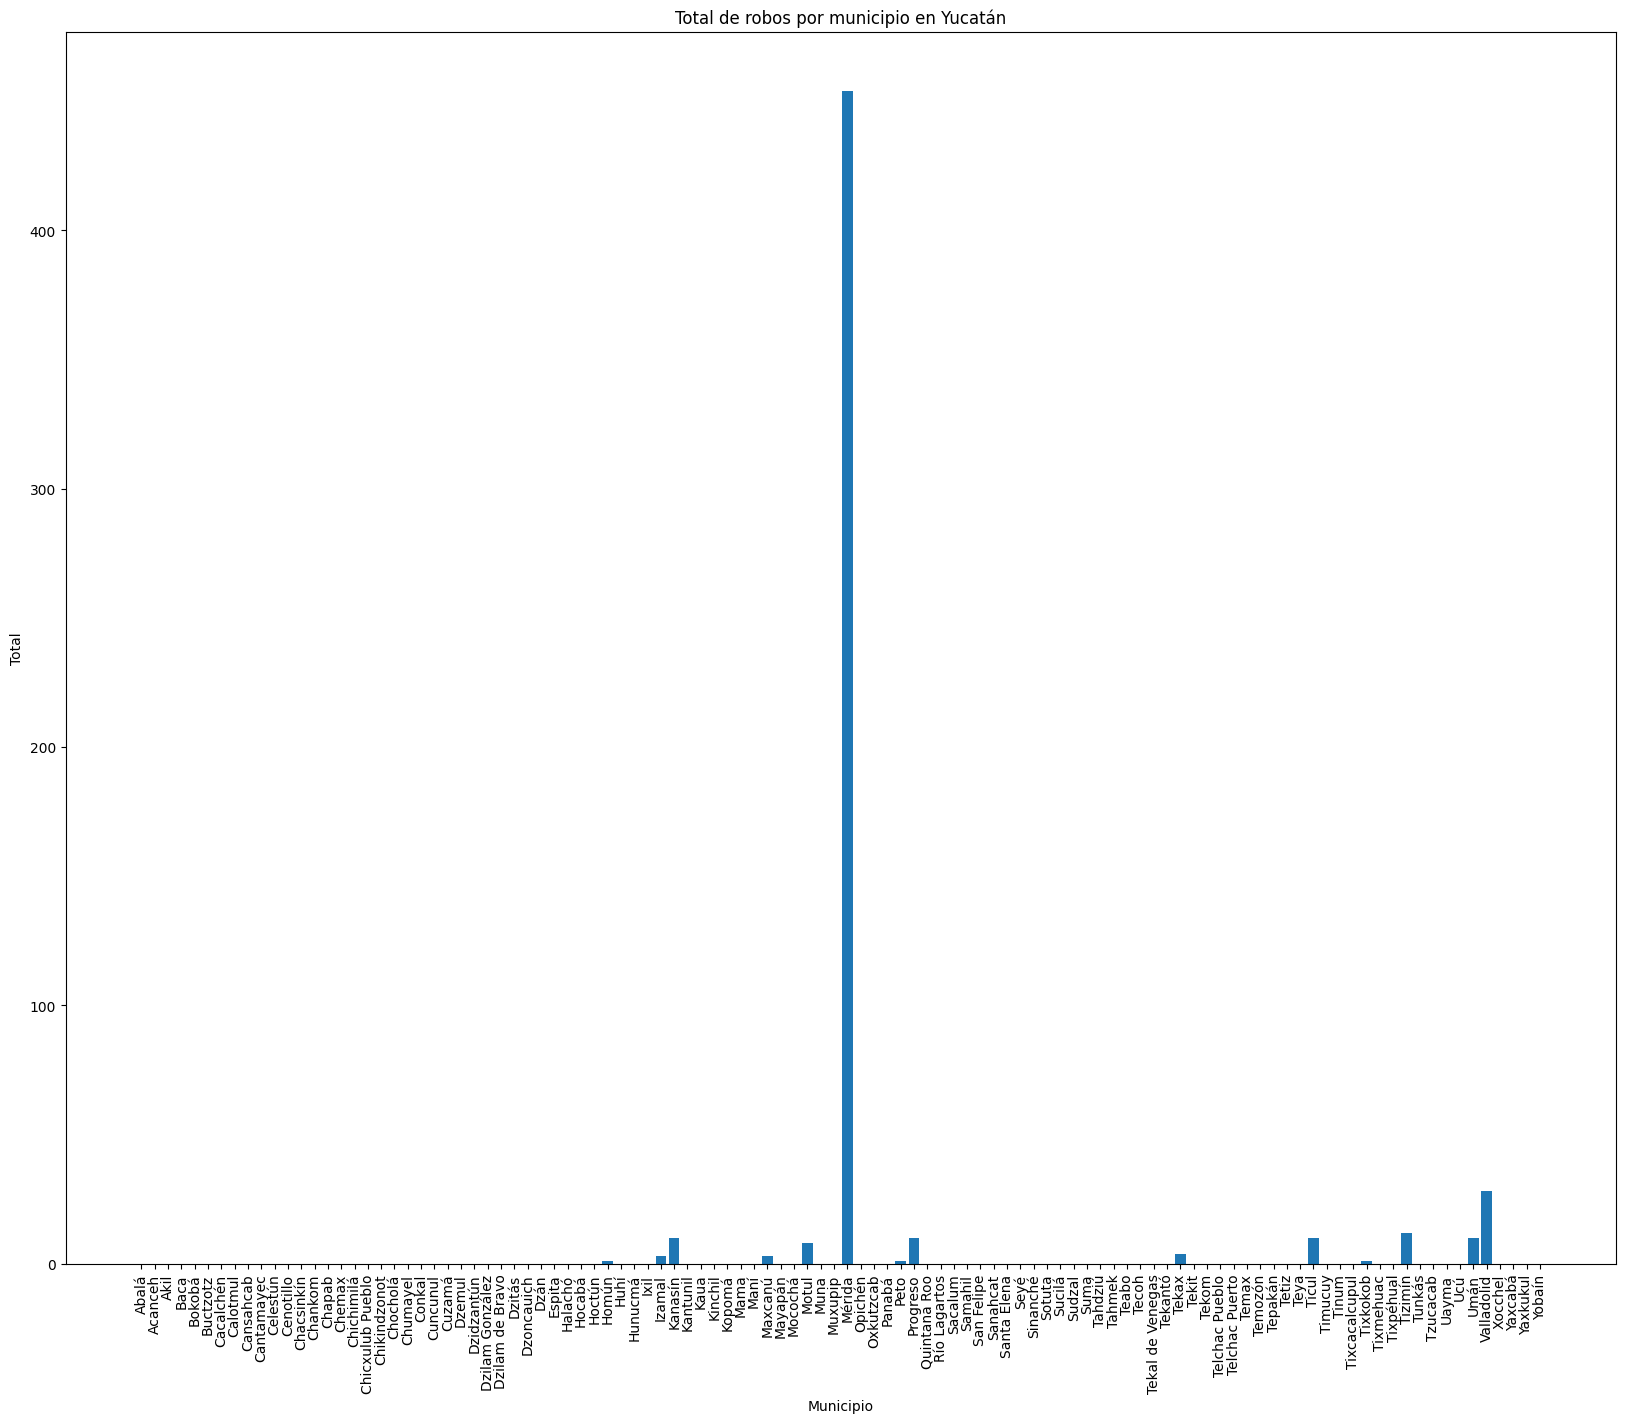

In [ ]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20,16))

# Crear un gráfico de barras
ax.bar(total_rcmuny['Municipio'], total_rcmuny['Total'])

# Ajustar las etiquetas del eje x
ax.set_xticklabels(total_rcmuny['Municipio'], rotation=90)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en Yucatán')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

####Campeche

In [ ]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
cam = cochertodo.loc[(cochertodo['Entidad'] == 'Campeche')]
cam.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
2099,2015,4,Campeche,4001,Calkiní,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
2100,2015,4,Campeche,4001,Calkiní,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,0,0,0,0,0,0,1,1
2197,2015,4,Campeche,4002,Campeche,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
2198,2015,4,Campeche,4002,Campeche,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,2,2,11,7,2,9,8,9,6,64
2295,2015,4,Campeche,4003,Carmen,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
camtodo = cam.groupby('Año')['Total'].sum().reset_index()
camtodo.head()

,Año,Total
0,2015,73
1,2016,196
2,2017,159
3,2018,120
4,2019,153


In [ ]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=camtodo['Año'], y=camtodo['Total'], mode='lines+markers', line=dict(color='darkolivegreen'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Campeche', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [ ]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmuncam = cochertodo.loc[cochertodo['Entidad'] == 'Campeche', ['Municipio','Modalidad', 'Total']].copy()
rcmuncam.head()

,Municipio,Modalidad,Total
2099,Calkiní,Robo de coche de 4 ruedas Con violencia,0
2100,Calkiní,Robo de coche de 4 ruedas Sin violencia,1
2197,Campeche,Robo de coche de 4 ruedas Con violencia,0
2198,Campeche,Robo de coche de 4 ruedas Sin violencia,64
2295,Carmen,Robo de coche de 4 ruedas Con violencia,0


In [ ]:
total_rcmuncam = rcmuncam.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmuncam.head()

,Municipio,Total
0,Calakmul,6
1,Calkiní,19
2,Campeche,486
3,Candelaria,26
4,Carmen,397


<ipython-input-244-ac5e819cd7cc>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



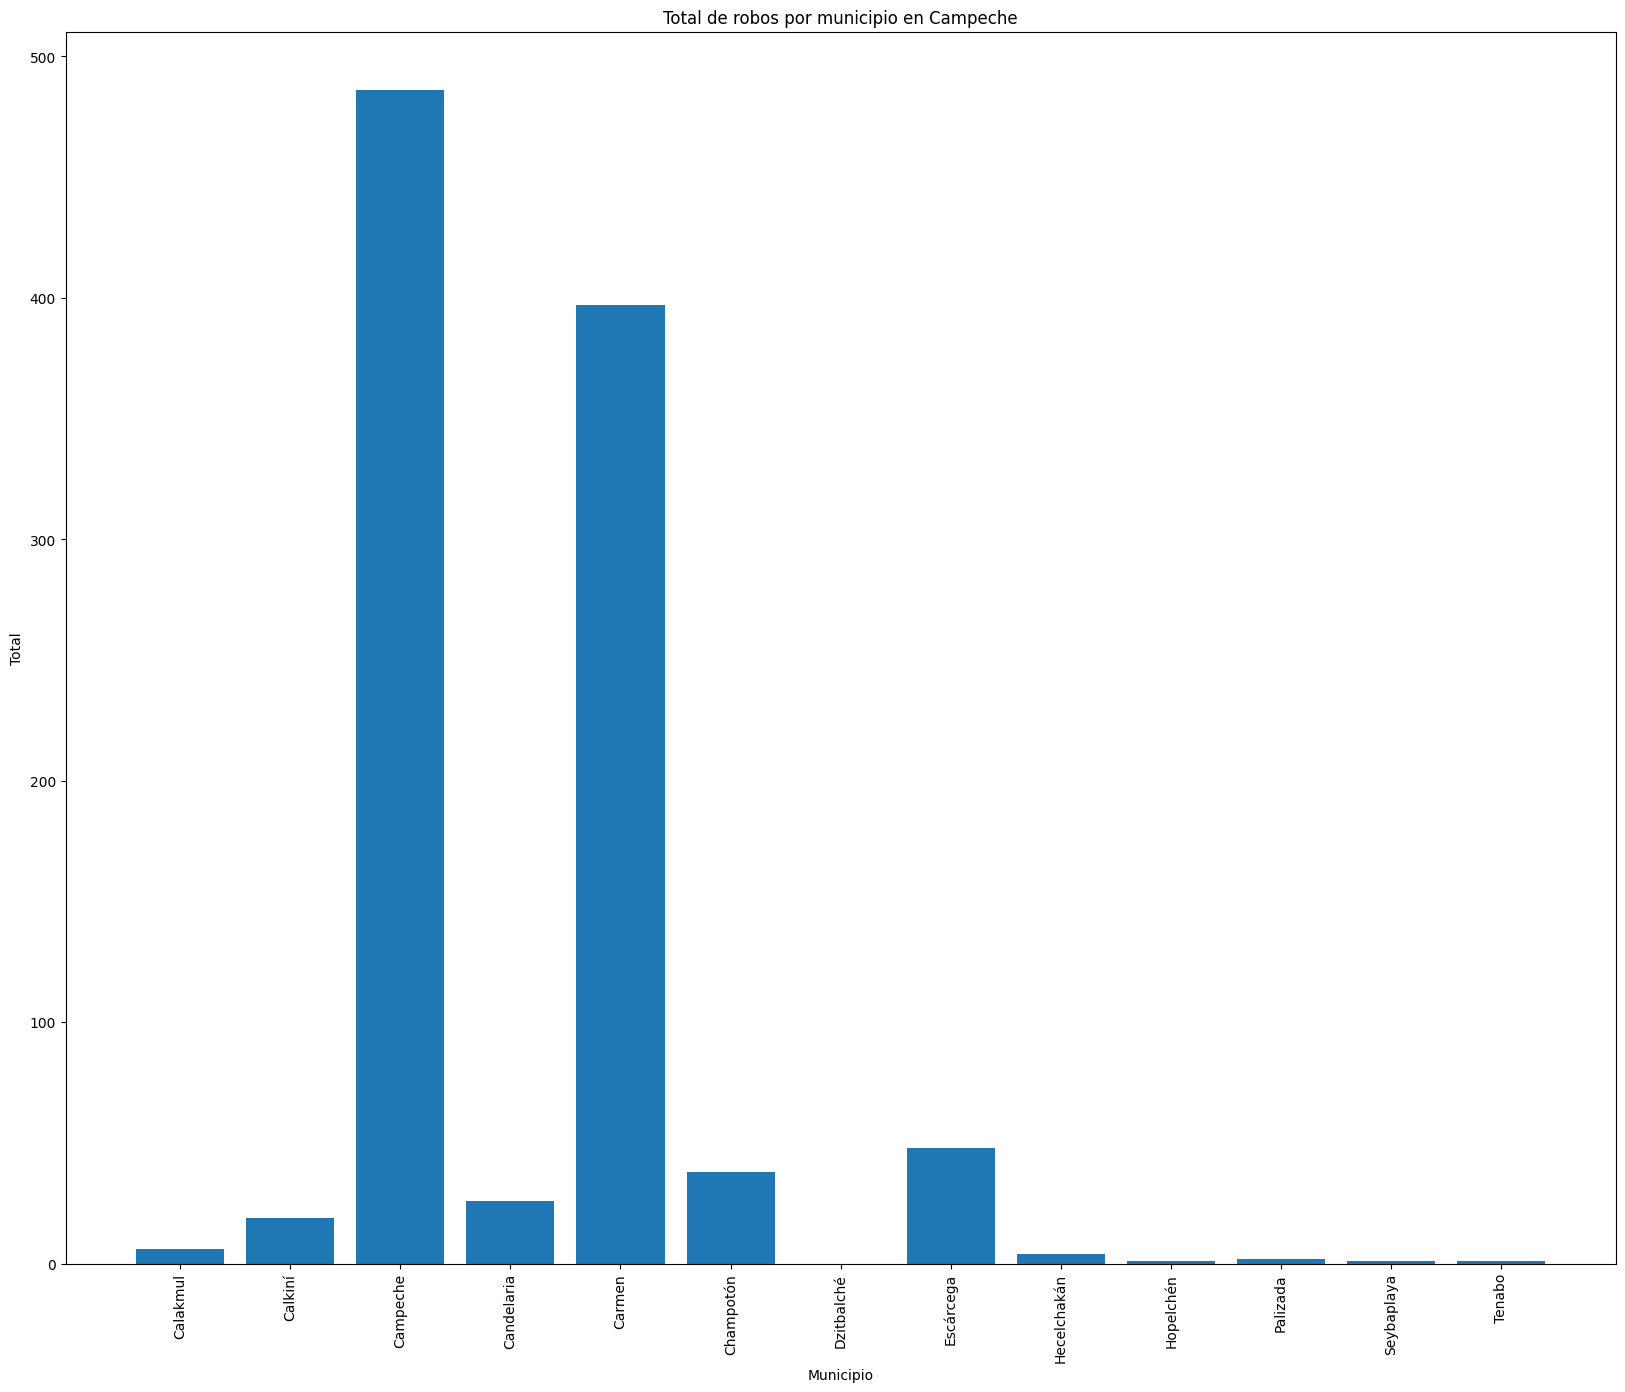

In [ ]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20,16))

# Crear un gráfico de barras
ax.bar(total_rcmuncam['Municipio'], total_rcmuncam['Total'])

# Ajustar las etiquetas del eje x
ax.set_xticklabels(total_rcmuncam['Municipio'], rotation=90)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en Campeche')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

####Nayarit

In [ ]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
na = cochertodo.loc[(cochertodo['Entidad'] == 'Nayarit')]
na.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
91083,2015,18,Nayarit,18001,Acaponeta,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,1,0,0,0,0,0,0,0,0,2
91084,2015,18,Nayarit,18001,Acaponeta,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,1,0,0,0,0,0,0,2
91181,2015,18,Nayarit,18002,Ahuacatlán,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,1,0,0,0,1
91182,2015,18,Nayarit,18002,Ahuacatlán,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,0,0,0,0,1,0,0,1
91279,2015,18,Nayarit,18003,Amatlán de Cañas,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
natodo = na.groupby('Año')['Total'].sum().reset_index()
natodo.head()

,Año,Total
0,2015,188
1,2016,168
2,2017,221
3,2018,703
4,2019,281


In [ ]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=natodo['Año'], y=natodo['Total'], mode='lines+markers', line=dict(color='saddlebrown'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Nayarit', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [ ]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmunna = cochertodo.loc[cochertodo['Entidad'] == 'Nayarit', ['Municipio','Modalidad', 'Total']].copy()
rcmunna.head()

,Municipio,Modalidad,Total
91083,Acaponeta,Robo de coche de 4 ruedas Con violencia,2
91084,Acaponeta,Robo de coche de 4 ruedas Sin violencia,2
91181,Ahuacatlán,Robo de coche de 4 ruedas Con violencia,1
91182,Ahuacatlán,Robo de coche de 4 ruedas Sin violencia,1
91279,Amatlán de Cañas,Robo de coche de 4 ruedas Con violencia,0


In [ ]:
total_rcmunna = rcmunna.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmunna.head()

,Municipio,Total
0,Acaponeta,52
1,Ahuacatlán,18
2,Amatlán de Cañas,13
3,Bahía de Banderas,602
4,Compostela,137


<ipython-input-250-6170fdc08bde>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



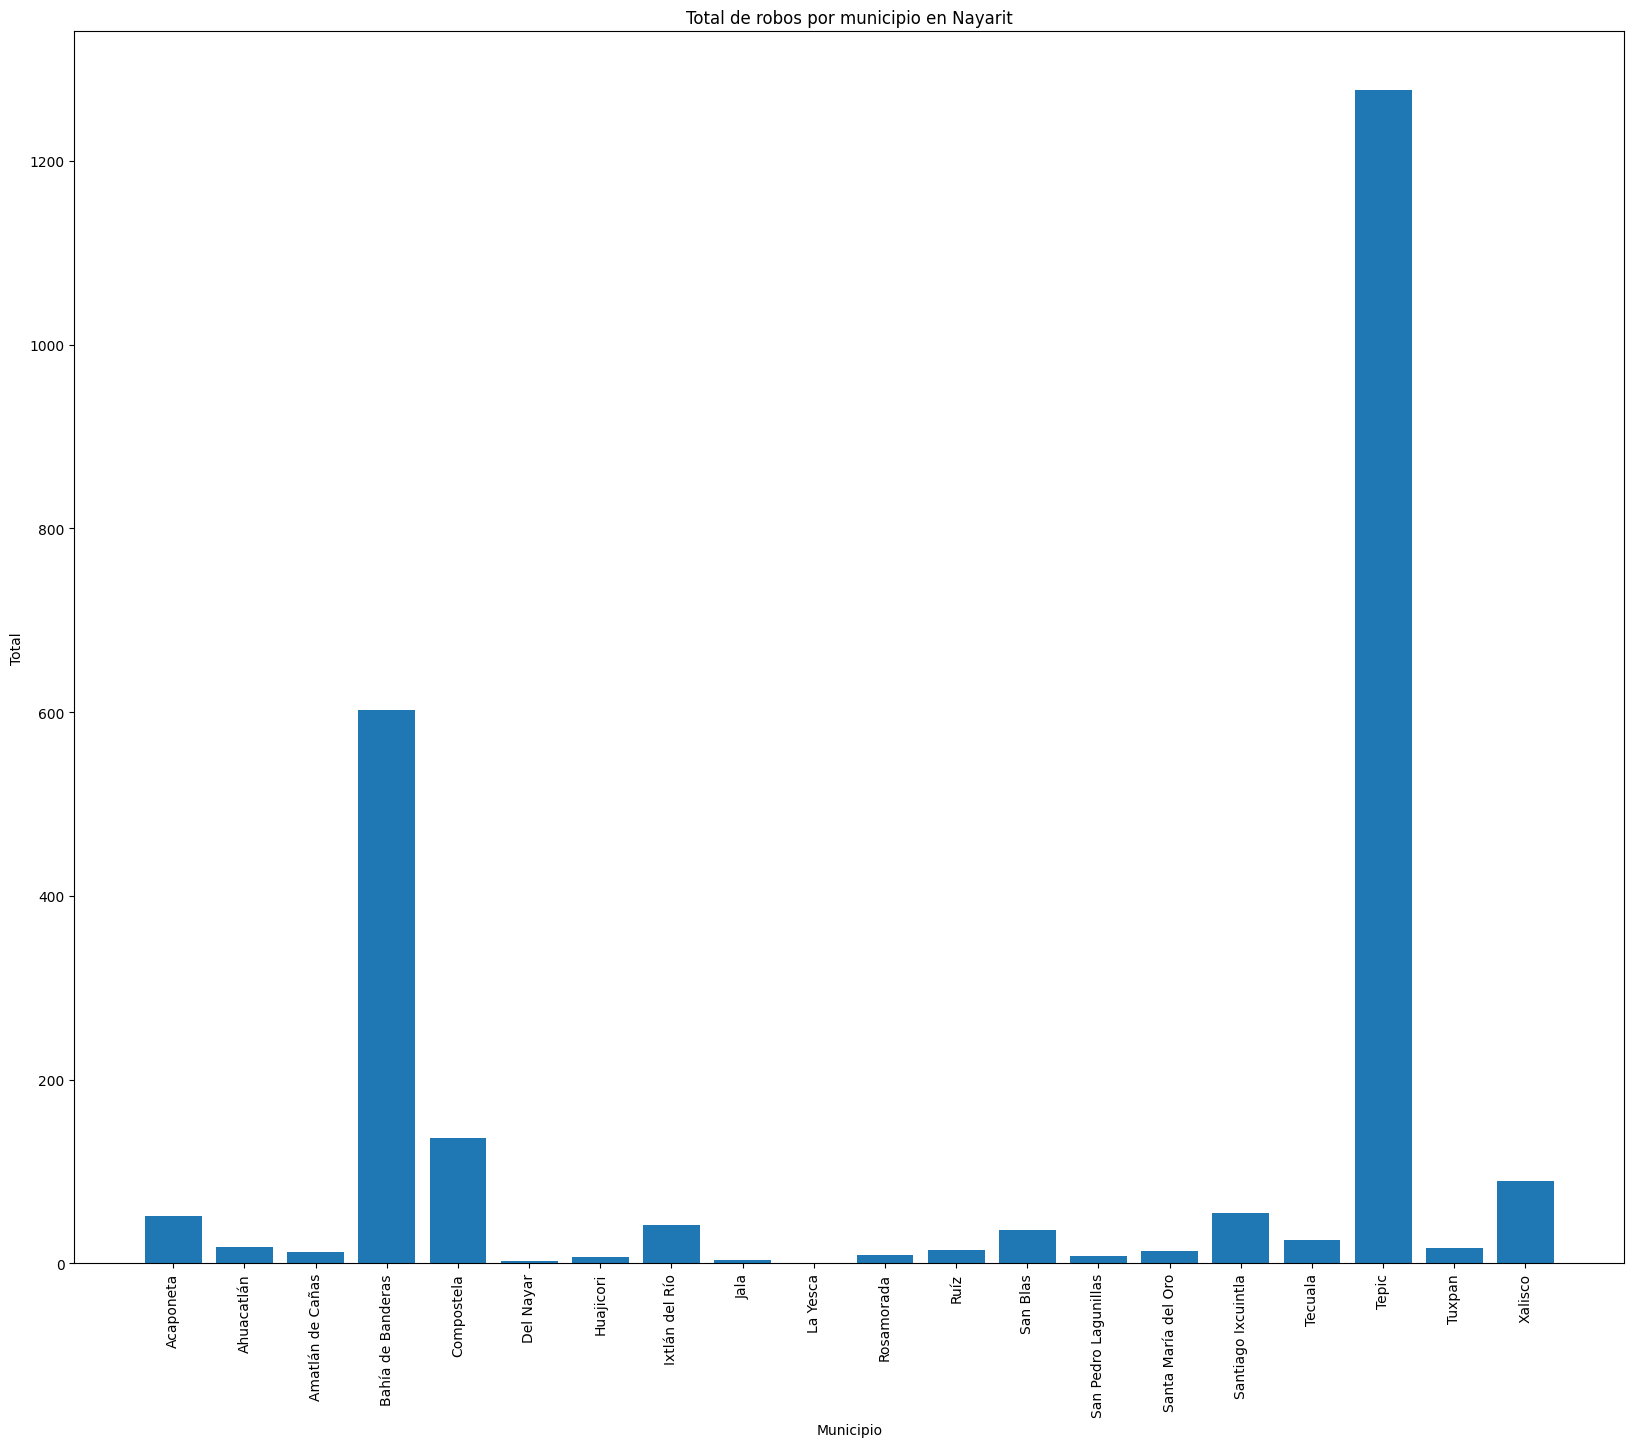

In [ ]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20,16))

# Crear un gráfico de barras
ax.bar(total_rcmunna['Municipio'], total_rcmunna['Total'])

# Ajustar las etiquetas del eje x
ax.set_xticklabels(total_rcmunna['Municipio'], rotation=90)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en Nayarit')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

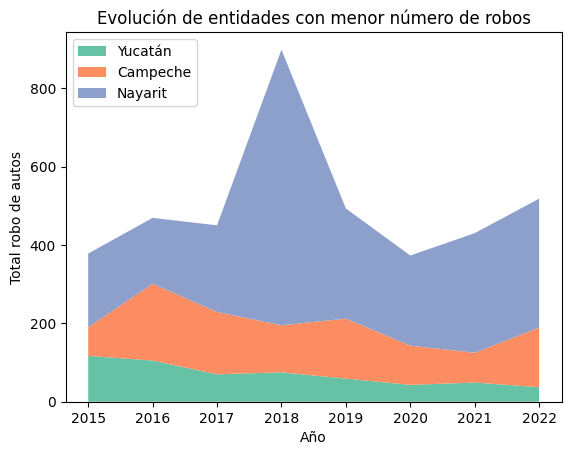

In [ ]:
fig, ax = plt.subplots()
pal = sns.color_palette("Set2")
ax.stackplot(ytodo['Año'], ytodo['Total'], camtodo['Total'], natodo['Total'], labels=['Yucatán', 'Campeche', 'Nayarit'], colors=pal)
ax.set_xlabel('Año')
ax.set_ylabel('Total robo de autos')
ax.set_title('Evolución de entidades con menor número de robos')
ax.legend(loc='upper left')

In [ ]:
print(df2015b.shape)
print(df2016b.shape)
print(df2017b.shape)
print(df2018b.shape)
print(df2019b.shape)
print(df2020b.shape)
print(df2021b.shape)
print(df2022b.shape)
print(dftodob.shape)

(3862, 21)
(3862, 21)
(4932, 21)
(4942, 21)
(4942, 21)
(4942, 21)
(4956, 21)
(4958, 21)
(37396, 21)


# Datos ENVIPE


Cargamos los datos del año que viene el csv pero es del año anterior

##ENVIPE 2016

In [ ]:
# Cargamos los datos del módulo de victimización
tmod_vic_envipe2015 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/tmod_vic_envipe2016.csv', encoding='ISO-8859-1', delimiter=',')
tmod_vic_envipe2015.head()

,ID_VIV,ID_HOG,ID_PER,ID_DEL,UPM,VIV_SEL,HOGAR,ND_TIPO,TD_TIPO,BPCOD,...,BP6_1,BP6_2,BP6_3,BP7_1,FAC_DEL,FAC_DEL_AM,DOMINIO,ESTRATO,EST_DIS,UPM_DIS
0,101318.05,0101318.05.01\r,0101318.05.01.03\r,0101318.05.01.03.03.1\r,101318,5,1,1,1,3,...,\r,\r,\r,\r,206,000206\r,U\r,4,3,176
1,101989.02,0101989.02.01\r,0101989.02.01.02\r,0101989.02.01.02.02.1\r,101989,2,1,1,1,2,...,\r,\r,\r,\r,286,000286\r,U\r,2,1,256
2,100777.01,0100777.01.02\r,0100777.01.02.01\r,0100777.01.02.01.02.2\r,100777,1,2,2,2,2,...,\r,\r,\r,\r,195,000195\r,U\r,2,1,99
3,101318.03,0101318.03.01\r,0101318.03.01.01\r,0101318.03.01.01.04.1\r,101318,3,1,1,1,4,...,\r,\r,\r,\r,206,000206\r,U\r,4,3,176
4,100457.03,0100457.03.01\r,0100457.03.01.03\r,0100457.03.01.03.02.3\r,100457,3,1,3,3,2,...,\r,\r,\r,\r,202,000202\r,U\r,2,1,62


In [ ]:
tmod_vic_envipe2015.shape

(40026, 127)

In [ ]:
# Nos interesa saber la columna BPCOD ya que nos interesa el número 1 que contiene el delito de robo de auto total
tmod_vic_envipe2015['BPCOD'].dtype

dtype('int64')

In [ ]:
# También podemos saber de que tipo son el área de ocurrencia y poder ponerle el nombre para identificarlos mejor
tmod_vic_envipe2015['AREAM_OCU'].dtype

dtype('O')

In [ ]:
tmod_vic_envipe2015.dtypes

ID_VIV        float64
ID_HOG         object
ID_PER         object
ID_DEL         object
UPM             int64
               ...   
FAC_DEL_AM     object
DOMINIO        object
ESTRATO         int64
EST_DIS         int64
UPM_DIS         int64
Length: 127, dtype: object

In [ ]:
tmod_vic_envipe2015.isna().sum()

ID_VIV        0
ID_HOG        0
ID_PER        0
ID_DEL        0
UPM           0
             ..
FAC_DEL_AM    0
DOMINIO       0
ESTRATO       0
EST_DIS       0
UPM_DIS       0
Length: 127, dtype: int64

In [ ]:
#Vemos que datos hacen falta
tmod_vic_envipe2015['BPCOD'].isna().sum()

0

In [ ]:
print(tmod_vic_envipe2015['AREAM_OCU'].unique())

['14\r' '\r' '21\r' '40\r' '28\r' '17\r' '33\r' '19\r' '09\r' '01\r'
 '26\r' '05\r' '13\r' '43\r' '02\r' '16\r' '15\r' '29\r' '27\r' '03\r'
 '31\r' '04\r' '36\r' '41\r' '07\r' '24\r' '25\r' '18\r' '10\r' '39\r'
 '12\r' '08\r' '32\r']


In [ ]:
# Reemplazar el carácter "\r" por una cadena vacía en la columna "AREAM_OCU"
tmod_vic_envipe2015['AREAM_OCU'] = tmod_vic_envipe2015['AREAM_OCU'].apply(lambda x: str(x).replace('\r', ''))

# Verificar el resultado
print(tmod_vic_envipe2015['AREAM_OCU'].unique())

['14' '' '21' '40' '28' '17' '33' '19' '09' '01' '26' '05' '13' '43' '02'
 '16' '15' '29' '27' '03' '31' '04' '36' '41' '07' '24' '25' '18' '10'
 '39' '12' '08' '32']


In [ ]:
# Nos quedamos con el código en BPCOD 01 que es el robo total de vehículo
rtotal_envipe2015 = tmod_vic_envipe2015.loc[(tmod_vic_envipe2015['BPCOD'] == 1)]
rtotal_envipe2015.head()

,ID_VIV,ID_HOG,ID_PER,ID_DEL,UPM,VIV_SEL,HOGAR,ND_TIPO,TD_TIPO,BPCOD,...,BP6_1,BP6_2,BP6_3,BP7_1,FAC_DEL,FAC_DEL_AM,DOMINIO,ESTRATO,EST_DIS,UPM_DIS
15,101320.02,0101320.02.01\r,0101320.02.01.02\r,0101320.02.01.02.01.1\r,101320,2,1,1,2,1,...,\r,\r,\r,\r,228,000228\r,U\r,4,3,177
26,101320.02,0101320.02.01\r,0101320.02.01.02\r,0101320.02.01.02.01.2\r,101320,2,1,2,2,1,...,\r,\r,\r,\r,228,000228\r,U\r,4,3,177
45,101163.03,0101163.03.01\r,0101163.03.01.03\r,0101163.03.01.03.01.1\r,101163,3,1,1,1,1,...,\r,\r,\r,\r,182,000182\r,U\r,3,2,155
106,101608.02,0101608.02.01\r,0101608.02.01.01\r,0101608.02.01.01.01.1\r,101608,2,1,1,1,1,...,\r,\r,\r,\r,188,000188\r,U\r,3,2,215
107,100631.01,0100631.01.01\r,0100631.01.01.01\r,0100631.01.01.01.01.1\r,100631,1,1,1,1,1,...,\r,\r,\r,\r,170,000170\r,U\r,2,1,84


In [ ]:
# Sacamos el número de robos 
rtotal_envipe2015.shape

(965, 127)

In [ ]:
# Vamos a ponerle nombre a los números de las entidades, usaremos los mismos nombres que los de los datos de SESNSP
rtotal_envipe2015 = rtotal_envipe2015.copy()
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('01', 'Ciudad de México')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('02', 'Jalisco')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('03', 'Nuevo León')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('04', 'Puebla')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('05', 'Guanajuato')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('07', 'San Luis Potosí')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('08', 'Yucatán')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('09', 'Chihuahua')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('10', 'Tamaulipas')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('12', 'Veracruz de Ignacio de la Llave')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('13', 'Guerrero')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('14', 'Aguascalientes')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('15', 'Michoacán de Ocampo')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('16', 'México')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('17', 'Coahuila de Zaragoza')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('18', 'Tabasco')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('19', 'Chiapas')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('21', 'Baja California')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('24', 'Sinaloa')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('25', 'Sonora')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('26', 'Durango')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('27', 'Nayarit')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('28', 'Campeche')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('29', 'Morelos')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('31', 'Oaxaca')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('32', 'Zacatecas')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('33', 'Colima')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('36', 'Querétaro')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('39', 'Tlaxcala')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('40', 'Baja California Sur')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('41', 'Quintana Roo')
rtotal_envipe2015.loc[:, 'AREAM_OCU'] = rtotal_envipe2015['AREAM_OCU'].str.replace('43', 'Hidalgo')

# Checamos que se hayan cargado bien los datos
rtotal_envipe2015['AREAM_OCU'].unique()

array(['Aguascalientes', '', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [ ]:
rtotal_envipe2015['BP1_2C'].dtype

dtype('int64')

In [ ]:
#Pasamos la columna BP1_2C a tipo object para ponerle el nombre de la entidad en donde ocurrió el robo
rtotal_envipe2015['BP1_2C'] = rtotal_envipe2015['BP1_2C'].astype(str)
rtotal_envipe2015['BP1_2C'].dtype

dtype('O')

In [ ]:
rtotal_envipe2015['BP1_2C'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32'], dtype=object)

In [ ]:
# Vamos a ponerle nombre a los números de las entidades, usaremos los mismos nombres que los de los datos de SESNSP
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '1', 'BP1_2C'] = 'Aguascalientes'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '2', 'BP1_2C'] = 'Baja California'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '3', 'BP1_2C'] = 'Baja California Sur'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '4', 'BP1_2C'] = 'Campeche'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '5', 'BP1_2C'] = 'Coahuila de Zaragoza'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '6', 'BP1_2C'] = 'Colima'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '7', 'BP1_2C'] = 'Chiapas'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '8', 'BP1_2C'] = 'Chihuahua'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '9', 'BP1_2C'] = 'Ciudad de México'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '10', 'BP1_2C'] = 'Durango'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '11', 'BP1_2C'] = 'Guanajuato'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '12', 'BP1_2C'] = 'Guerrero'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '13', 'BP1_2C'] = 'Hidalgo'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '14', 'BP1_2C'] = 'Jalisco'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '15', 'BP1_2C'] = 'México'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '16', 'BP1_2C'] = 'Michoacán de Ocampo'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '17', 'BP1_2C'] = 'Morelos'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '18', 'BP1_2C'] = 'Nayarit'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '19', 'BP1_2C'] = 'Nuevo León'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '20', 'BP1_2C'] = 'Oaxaca'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '21', 'BP1_2C'] = 'Puebla'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '22', 'BP1_2C'] = 'Querétaro'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '23', 'BP1_2C'] = 'Quintana Roo'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '24', 'BP1_2C'] = 'San Luis Potosí'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '25', 'BP1_2C'] = 'Sinaloa'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '26', 'BP1_2C'] = 'Sonora'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '27', 'BP1_2C'] = 'Tabasco'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '28', 'BP1_2C'] = 'Tamaulipas'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '29', 'BP1_2C'] = 'Tlaxcala'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '30', 'BP1_2C'] = 'Veracruz de la Llave'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '31', 'BP1_2C'] = 'Yucatán'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '32', 'BP1_2C'] = 'Zacatecas'
rtotal_envipe2015.loc[rtotal_envipe2015['BP1_2C'] == '99', 'BP1_2C'] = 'No especificado'

rtotal_envipe2015['BP1_2C'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de la Llave', 'Yucatán', 'Zacatecas'], dtype=object)

In [ ]:
# Hacemos un df en donde juntemos en que entidad hubieron más casos de robo total de automóvil
totalrctodoentenvipe = rtotal_envipe2015['BP1_2C'].value_counts().reset_index()
totalrctodoentenvipe.columns = ['Entidad', 'Total']
totalrctodoentenvipe.head()

,Entidad,Total
0,Baja California,95
1,México,79
2,Jalisco,61
3,Michoacán de Ocampo,56
4,Chihuahua,51


In [ ]:
# Checamos que estén bien los datos y que si sean 32 entidades
totalrctodoentenvipe.shape

(32, 2)

In [ ]:
# Sacamos los estados que tuvieron mayores robos en 2015
tres_estados_mas_robados = totalrctodoentenvipe.nlargest(3, 'Total')
tres_estados_mas_robados.head()

,Entidad,Total
0,Baja California,95
1,México,79
2,Jalisco,61


In [ ]:
# Sacamos los estados que tuvieron menos robos en 2015
tres_estados_menos_robados = totalrctodoentenvipe.nsmallest(3, 'Total')
tres_estados_menos_robados.head()

,Entidad,Total
30,San Luis Potosí,6
31,Oaxaca,6
27,Nayarit,7


In [ ]:
rtotal_envipe2015.shape

(965, 127)

In [ ]:
rtotal_envipe2015[rtotal_envipe2015['AREAM_OCU'] == '']

,ID_VIV,ID_HOG,ID_PER,ID_DEL,UPM,VIV_SEL,HOGAR,ND_TIPO,TD_TIPO,BPCOD,...,BP6_1,BP6_2,BP6_3,BP7_1,FAC_DEL,FAC_DEL_AM,DOMINIO,ESTRATO,EST_DIS,UPM_DIS
1203,160252.13,0160252.13.01\r,0160252.13.01.01\r,0160252.13.01.01.01.1\r,160252,13,1,1,1,1,...,\r,\r,\r,\r,179,\r,R\r,2,11,304
1226,200147.03,0200147.03.01\r,0200147.03.01.03\r,0200147.03.01.03.01.1\r,200147,3,1,1,1,1,...,\r,\r,\r,\r,378,\r,U\r,3,24,315
1231,200199.04,0200199.04.01\r,0200199.04.01.01\r,0200199.04.01.01.01.1\r,200199,4,1,1,1,1,...,\r,\r,\r,\r,339,\r,U\r,3,24,316
1330,200827.02,0200827.02.01\r,0200827.02.01.02\r,0200827.02.01.02.01.1\r,200827,2,1,1,1,1,...,\r,\r,\r,\r,323,\r,U\r,3,24,355
1367,207250.02,0207250.02.01\r,0207250.02.01.01\r,0207250.02.01.01.01.1\r,207250,2,1,1,1,1,...,\r,\r,\r,\r,393,\r,U\r,2,16,748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39509,3260271.07,3260271.07.01\r,3260271.07.01.01\r,3260271.07.01.01.01.1\r,3260271,7,1,1,1,1,...,\r,\r,\r,\r,240,\r,R\r,2,595,11881
39650,3201311.06,3201311.06.01\r,3201311.06.01.02\r,3201311.06.01.02.01.1\r,3201311,6,1,1,1,1,...,\r,\r,\r,\r,197,\r,C\r,3,591,11837
39672,3260348.11,3260348.11.01\r,3260348.11.01.01\r,3260348.11.01.01.01.1\r,3260348,11,1,1,1,1,...,\r,\r,\r,\r,212,\r,R\r,2,595,11888
39705,3201421.05,3201421.05.01\r,3201421.05.01.02\r,3201421.05.01.02.01.1\r,3201421,5,1,1,1,1,...,\r,\r,\r,\r,241,\r,C\r,2,590,11840


In [ ]:
rtotal_envipe2015['AREAM_OCU'].tail(15)

39489             
39494             
39509             
39538    Zacatecas
39550    Zacatecas
39609    Zacatecas
39650             
39672             
39705             
39852             
39937    Zacatecas
39955    Zacatecas
39966    Zacatecas
39972    Zacatecas
39985    Zacatecas
Name: AREAM_OCU, dtype: object

In [ ]:
# Filtrar las filas que contienen el número 1 en la columna "columna1"
sumat15_envipe = rtotal_envipe2015[rtotal_envipe2015['BPCOD'] == 1].shape[0]

# Imprimir el número de renglones
print(sumat15_envipe)

965


In [ ]:
tmod_vic_envipe2015.shape

(40026, 127)

In [ ]:
rtotal_envipe2015.shape

(965, 127)

In [ ]:
totalrcenvipe = rtotal_envipe2015.groupby('BP1_2C').sum().reset_index()
totalrcenvipe.head()

<ipython-input-279-ca0671a66432>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,BP1_2C,ID_VIV,UPM,VIV_SEL,HOGAR,ND_TIPO,TD_TIPO,BPCOD,R_SEL,BP1_1,BP1_3C,BP1_4,BP1_5,BP1_20,BP1_30,BP1_33,FAC_DEL,ESTRATO,EST_DIS,UPM_DIS
0,Aguascalientes,3104686.85,3104686,85,30,31,33,29,45,169,43,81,42,32,50,43,5603,82,91,4075
1,Baja California,19410597.10,19410593,410,95,106,117,95,162,1211,291,292,198,118,154,145,36506,261,1782,54009
2,Baja California Sur,14430567.87,14430565,287,48,50,52,48,84,384,199,140,90,68,81,83,4080,141,1875,46130
3,Campeche,4408427.25,4408427,25,12,12,13,11,18,73,31,25,26,14,20,11,1172,24,597,14057
4,Chiapas,5629149.46,5629149,46,7,8,9,7,10,46,542,17,16,9,12,7,2975,15,922,20024


In [ ]:
# Sacamos los estados que tuvieron menor número de robos de 2015 al 2022

tres_estados_menos_robados_envipe = rtotal_envipe2015.nsmallest(3, 'BP1_2C')
tres_estados_menos_robados_envipe['BP1_2C']

TypeError: ignored


Prueba


In [ ]:
tmod_vic_envipe2015.head()

,ID_VIV,ID_HOG,ID_PER,ID_DEL,UPM,VIV_SEL,HOGAR,ND_TIPO,TD_TIPO,BPCOD,...,BP6_1,BP6_2,BP6_3,BP7_1,FAC_DEL,FAC_DEL_AM,DOMINIO,ESTRATO,EST_DIS,UPM_DIS
0,101318.05,0101318.05.01\r,0101318.05.01.03\r,0101318.05.01.03.03.1\r,101318,5,1,1,1,3,...,\r,\r,\r,\r,206,000206\r,U\r,4,3,176
1,101989.02,0101989.02.01\r,0101989.02.01.02\r,0101989.02.01.02.02.1\r,101989,2,1,1,1,2,...,\r,\r,\r,\r,286,000286\r,U\r,2,1,256
2,100777.01,0100777.01.02\r,0100777.01.02.01\r,0100777.01.02.01.02.2\r,100777,1,2,2,2,2,...,\r,\r,\r,\r,195,000195\r,U\r,2,1,99
3,101318.03,0101318.03.01\r,0101318.03.01.01\r,0101318.03.01.01.04.1\r,101318,3,1,1,1,4,...,\r,\r,\r,\r,206,000206\r,U\r,4,3,176
4,100457.03,0100457.03.01\r,0100457.03.01.03\r,0100457.03.01.03.02.3\r,100457,3,1,3,3,2,...,\r,\r,\r,\r,202,000202\r,U\r,2,1,62


In [ ]:
tper_vic2_envipe2015 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2016 que es 2015/tper_vic2_envipe2016.csv', encoding='ISO-8859-1', delimiter=',')
tper_vic2_envipe2015.head()

In [ ]:
# Reemplazar el carácter "\r" por una cadena vacía en la columna "AREAM_OCU"
tper_vic2_envipe2015['ID_PER'] = tper_vic2_envipe2015['ID_PER'].apply(lambda x: str(x).replace('\r', ''))

# Verificar el resultado
print(tper_vic2_envipe2015['ID_PER'].unique())

In [ ]:
# Reemplazar el carácter "\r" por una cadena vacía en la columna "AREAM_OCU"
tmod_vic_envipe2015['ID_PER'] = tmod_vic_envipe2015['ID_PER'].apply(lambda x: str(x).replace('\r', ''))

# Verificar el resultado
print(tmod_vic_envipe2015['ID_PER'].unique())

In [ ]:
junto = pd.merge(tmod_vic_envipe2015,tper_vic2_envipe2015, on='ID_PER', how = 'inner')
junto.head()

In [ ]:
junto[['ID_VIV_x', 'ID_VIV_y']]

In [ ]:
# Nos quedamos con el código en BPCOD 01 que es el robo total de vehículo
vic2_rtotal_envipe2015 = tper_vic2_envipe2015.loc[(tper_vic2_envipe2015['AP6_4_01'] == 1)]
vic2_rtotal_envipe2015.head()

In [ ]:
print(rtotal_envipe2015.shape) #módulo de victimización
print(vic2_rtotal_envipe2015.shape) #victimización del hogar

In [ ]:
# Crear una copia del DataFrame original
df_copia = vic2_rtotal_envipe2015.copy()

# Reemplazar el carácter "\r" por una cadena vacía en la columna "AP6_6_01"
df_copia.loc[:, 'AP6_6_01'] = df_copia.loc[:, 'AP6_6_01'].apply(lambda x: str(x).replace('\r', ''))

# Reemplazar cadenas vacías por ceros
df_copia.loc[df_copia['AP6_6_01'] == '', 'AP6_6_01'] = '0'

# Convertir la columna a tipo int
df_copia['AP6_6_01'] = df_copia['AP6_6_01'].astype(int)

# Verificar el resultado
print(df_copia['AP6_6_01'].dtype)

In [ ]:
# Ahora nos quedamos con los que le tuvieron que hacer la pregnta 6.6 para que le hcieran la encuesta de módulo
mod = df_copia.loc[(df_copia['AP6_6_01'] >= 1)]
mod.head()

In [ ]:
df_copia.shape

In [ ]:
rtotal_envipe2015['BP2_1'].unique()

In [ ]:
print(rtotal_envipe2015.shape)
print(rtotal_envipe2015.loc[(rtotal_envipe2015['BP2_1'] == '1\r')].shape)

In [ ]:
print(rtotal_envipe2015.columns)
print(vic2_rtotal_envipe2015.columns)

In [ ]:
tper_vic2_envipe2015['AP6_6_01'].unique()

In [ ]:
suma66 = tper_vic2_envipe2015.loc[(tper_vic2_envipe2015['AP6_6_01'] == '1\r') | (tper_vic2_envipe2015['AP6_6_01'] == '2\r') | 
                                (tper_vic2_envipe2015['AP6_6_01'] == '3\r')]
suma66.shape

In [ ]:
tper_vic2_envipe2015['AP7_4_05'].unique()

In [ ]:
suma74 = tper_vic2_envipe2015.loc[(tper_vic2_envipe2015['AP7_4_05'] == '1\r') | (tper_vic2_envipe2015['AP7_4_05'] == '2\r') | 
                                (tper_vic2_envipe2015['AP7_4_05'] == '3\r') | (tper_vic2_envipe2015['AP7_4_05'] == '5\r') | 
                                (tper_vic2_envipe2015['AP7_4_05'] == '4\r') | (tper_vic2_envipe2015['AP7_4_05'] == '20\r') |
                                (tper_vic2_envipe2015['AP7_4_05'] == '6\r') | (tper_vic2_envipe2015['AP7_4_05'] == '7\r')]
suma74.shape

Aqui

##ENVIPE TODO


In [ ]:
# Nos servirá para que al final podamos juntar los datos de todos los años en un solo df para comparar con los datos de la SESNSP
# Creamos el diccionario necesario

data = {'Año': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'Total': [sumat15_envipe, sumat16_envipe, sumat17_envipe, sumat18_envipe, 0, 0, 0, 0]}

df = pd.DataFrame(data)

df.head()

##ENVIPE 2017

In [ ]:
tmod_vic_envipe2016 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/tmod_vic_envipe2017.csv', encoding='ISO-8859-1', delimiter=',')
tmod_vic_envipe2016.head()

In [ ]:
tmod_vic_envipe2016['BPCOD'].isna().sum()

In [ ]:
# Nos quedamos con el código en BPCOD 01 que es el robo total de vehículo
rtotal_envipe2016 = tmod_vic_envipe2016.loc[(tmod_vic_envipe2016['BPCOD'] == 1)]
rtotal_envipe2016.head()

In [ ]:
# Filtrar las filas que contienen el número 1 en la columna "columna1"
sumat16_envipe = rtotal_envipe2016[rtotal_envipe2016['BPCOD'] == 1].shape[0]

# Imprimir el número de renglones
print(sumat16_envipe)

##ENVIPE 2018


In [ ]:
tmod_vic_envipe2017 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/tmod_vic_envipe2018.csv', encoding='ISO-8859-1', delimiter=',')
tmod_vic_envipe2017.head()

In [ ]:
tmod_vic_envipe2017['BPCOD'].isna().sum()

In [ ]:
# Nos quedamos con el código en BPCOD 01 que es el robo total de vehículo
rtotal_envipe2017 = tmod_vic_envipe2017.loc[(tmod_vic_envipe2017['BPCOD'] == 1)]
rtotal_envipe2017.head()

In [ ]:
# Filtrar las filas que contienen el número 1 en la columna "columna1"
sumat17_envipe = rtotal_envipe2017[rtotal_envipe2017['BPCOD'] == 1].shape[0]

# Imprimir el número de renglones
print(sumat17_envipe)

##ENVIPE 2019


In [ ]:
tmod_vic_envipe2018 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/tmod_vic_envipe2019.csv', encoding='ISO-8859-1', delimiter=',')
tmod_vic_envipe2018.head()

In [ ]:
tmod_vic_envipe2018['BPCOD'].isna().sum()

In [ ]:
# Nos quedamos con el código en BPCOD 01 que es el robo total de vehículo
rtotal_envipe2018 = tmod_vic_envipe2018.loc[(tmod_vic_envipe2018['BPCOD'] == 1)]
rtotal_envipe2018.head()

In [ ]:
# Filtrar las filas que contienen el número 1 en la columna "columna1"
sumat18_envipe = rtotal_envipe2018[rtotal_envipe2018['BPCOD'] == 1].shape[0]

# Imprimir el número de renglones
print(sumat18_envipe)

#Pregunta 1 de investigación

¿Existe una correlación entre la incidencia de robos de coche y la creencia general?

In [ ]:
dftodob.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,4,3,0,1,1,5,2,5,6,4
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,122,124,138,94,89,93,126,105,152,171
139,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,1,0,1
140,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,0,1,2,0,1,1,1,3
237,2015,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Vamos hacer un df en donde tengan los datos por cada estado usando la modalidad de robo de coches con y sin violencia por cada estado
rcmuntodo = cochertodo[['Año', 'Entidad', 'Municipio','Modalidad', 'Total']]
rcmuntodo.head()

,Año,Entidad,Municipio,Modalidad,Total
41,2015,Aguascalientes,Aguascalientes,Robo de coche de 4 ruedas Con violencia,36
42,2015,Aguascalientes,Aguascalientes,Robo de coche de 4 ruedas Sin violencia,1434
139,2015,Aguascalientes,Asientos,Robo de coche de 4 ruedas Con violencia,2
140,2015,Aguascalientes,Asientos,Robo de coche de 4 ruedas Sin violencia,9
237,2015,Aguascalientes,Calvillo,Robo de coche de 4 ruedas Con violencia,0


In [ ]:
rcmuntodo.shape

(37396, 5)

In [ ]:
cochertodo.shape

(37396, 22)

In [ ]:
# Vamos hacer un df en donde vamos a sumar el robo de coches con y sin violencia de acuerdo a su municipio y entidad
Robos1 = rcmuntodo.groupby(['Año', 'Entidad', 'Municipio']).agg({'Total': 'sum'}).reset_index()
Robos1.head()

,Año,Entidad,Municipio,Total
0,2015,Aguascalientes,Aguascalientes,1470
1,2015,Aguascalientes,Asientos,11
2,2015,Aguascalientes,Calvillo,13
3,2015,Aguascalientes,Cosío,4
4,2015,Aguascalientes,El Llano,3


In [ ]:
# Checamos que sea la mitad de datos que había al tener con y sin violencia
print(cochertodo.shape)
print(Robos1.shape)

(37396, 22)
(18698, 4)


In [ ]:
Robos2 = Robos1.groupby(['Año', 'Entidad']).agg({'Total': 'sum'}).reset_index()
Robos2.head()

,Año,Entidad,Total
0,2015,Aguascalientes,1641
1,2015,Baja California,14138
2,2015,Baja California Sur,1157
3,2015,Campeche,73
4,2015,Chiapas,1488


In [ ]:
Robos2.shape

(256, 3)

In [ ]:
Robos = Robos2.pivot(index='Año', columns='Entidad', values='Total')
Robos.head()

Entidad,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
Año,,,,,,,,,,,,,,,,,,,,,
2015,1641,14138,1157,73,1488,4427,10665,1451,575,1443,...,851,903,3337,4651,1708,6416,1131,6144,117,1959
2016,2601,16628,1746,196,1813,3746,9624,915,1070,1042,...,446,1328,3266,3691,2410,4284,1352,7560,105,2077
2017,2838,19732,1412,159,1832,4350,9012,889,1139,1198,...,870,1750,4759,3483,3252,4949,2157,8927,70,1924
2018,2523,15425,1233,120,1134,4818,11782,744,847,958,...,1012,2158,3764,2825,4308,3851,1983,6952,75,1802
2019,1642,13412,761,153,905,4540,10578,729,762,754,...,1516,2276,2535,2399,2460,2751,1595,6635,59,1418


In [ ]:
tper_vic1_envipe2016 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2016 que es 2015/tper_vic1_envipe2016.csv', 
                                   encoding='ISO-8859-1', delimiter=',')
tper_vic1_envipe2016.head()

<ipython-input-328-7ada91574d81>:1: DtypeWarning:

Columns (114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.



,ID_VIV,ID_HOG,ID_PER,UPM,VIV_SEL,HOGAR,RESUL_H,R_SEL,AREAM,AP4_1,...,AP5_6_10,AP5_8,FAC_HOG,FAC_ELE,FAC_HOG_AM,FAC_ELE_AM,DOMINIO,ESTRATO,EST_DIS,UPM_DIS
0,100006.01,0100006.01.01\r,0100006.01.01.03\r,100006,1,1,B\r,3,14\r,1,...,\r,1,168,841,000168\r,000841\r,U\r,3,2,1
1,100006.02,0100006.02.01\r,0100006.02.01.01\r,100006,2,1,B\r,1,14\r,3,...,1\r,1,168,336,000168\r,000336\r,U\r,3,2,1
2,100006.03,0100006.03.01\r,0100006.03.01.04\r,100006,3,1,B\r,4,14\r,3,...,\r,3,168,673,000168\r,000673\r,U\r,3,2,1
3,100006.04,0100006.04.01\r,0100006.04.01.01\r,100006,4,1,A\r,1,14\r,3,...,2\r,3,168,168,000168\r,000168\r,U\r,3,2,1
4,100006.04,0100006.04.02\r,0100006.04.02.01\r,100006,4,2,B\r,1,\r,1,...,\r,1,168,168,\r,\r,U\r,3,2,1


In [ ]:
tper_vic1_envipe2016 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2016 que es 2015/tper_vic1_envipe2016.csv', 
                                   encoding='ISO-8859-1', delimiter=',', dtype={'Columna 114': int, 'Columna 115': int, 'Columna 116': int})
tper_vic1_envipe2016.head()

<ipython-input-330-0177d7490405>:1: DtypeWarning:

Columns (114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.



,ID_VIV,ID_HOG,ID_PER,UPM,VIV_SEL,HOGAR,RESUL_H,R_SEL,AREAM,AP4_1,...,AP5_6_10,AP5_8,FAC_HOG,FAC_ELE,FAC_HOG_AM,FAC_ELE_AM,DOMINIO,ESTRATO,EST_DIS,UPM_DIS
0,100006.01,0100006.01.01\r,0100006.01.01.03\r,100006,1,1,B\r,3,14\r,1,...,\r,1,168,841,000168\r,000841\r,U\r,3,2,1
1,100006.02,0100006.02.01\r,0100006.02.01.01\r,100006,2,1,B\r,1,14\r,3,...,1\r,1,168,336,000168\r,000336\r,U\r,3,2,1
2,100006.03,0100006.03.01\r,0100006.03.01.04\r,100006,3,1,B\r,4,14\r,3,...,\r,3,168,673,000168\r,000673\r,U\r,3,2,1
3,100006.04,0100006.04.01\r,0100006.04.01.01\r,100006,4,1,A\r,1,14\r,3,...,2\r,3,168,168,000168\r,000168\r,U\r,3,2,1
4,100006.04,0100006.04.02\r,0100006.04.02.01\r,100006,4,2,B\r,1,\r,1,...,\r,1,168,168,\r,\r,U\r,3,2,1


In [ ]:
print(tper_vic1_envipe2016['AP5_2_1'].unique())
print(tper_vic1_envipe2016['AP5_2_2'].unique())
print(tper_vic1_envipe2016['AP5_2_3'].unique())


[3 1 5 2 9 4]
[3 1 2 5 4 9 '2\r' '5\r' '1\r' '4\r' '3\r' '9\r' '\r']
[1 3 4 2 5 9 '2\r' '1\r' '3\r' '4\r' '5\r' '9\r' '\r']


In [ ]:
tper_vic1_envipe2016 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2016 que es 2015/tper_vic1_envipe2016.csv', 
                                   encoding='ISO-8859-1', delimiter=',', dtype={'Columna 114': object, 'Columna 115': object, 'Columna 116': object})

tper_vic1_envipe2016.head()

<ipython-input-390-e32761211700>:1: DtypeWarning:

Columns (114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.



,ID_VIV,ID_HOG,ID_PER,UPM,VIV_SEL,HOGAR,RESUL_H,R_SEL,AREAM,AP4_1,...,AP5_6_10,AP5_8,FAC_HOG,FAC_ELE,FAC_HOG_AM,FAC_ELE_AM,DOMINIO,ESTRATO,EST_DIS,UPM_DIS
0,100006.01,0100006.01.01\r,0100006.01.01.03\r,100006,1,1,B\r,3,14\r,1,...,\r,1,168,841,000168\r,000841\r,U\r,3,2,1
1,100006.02,0100006.02.01\r,0100006.02.01.01\r,100006,2,1,B\r,1,14\r,3,...,1\r,1,168,336,000168\r,000336\r,U\r,3,2,1
2,100006.03,0100006.03.01\r,0100006.03.01.04\r,100006,3,1,B\r,4,14\r,3,...,\r,3,168,673,000168\r,000673\r,U\r,3,2,1
3,100006.04,0100006.04.01\r,0100006.04.01.01\r,100006,4,1,A\r,1,14\r,3,...,2\r,3,168,168,000168\r,000168\r,U\r,3,2,1
4,100006.04,0100006.04.02\r,0100006.04.02.01\r,100006,4,2,B\r,1,\r,1,...,\r,1,168,168,\r,\r,U\r,3,2,1


In [ ]:
# Nos quedamos con la columna AP4_3_3 ya que tiene la pregunta que si se siente seguro o inseguro la persona en ese estado
# 1 Seguro
# 2 Seguro
# 9 no sabe
tper_vic1_envipe2016['AP4_3_3'].unique()

array([1, 2, 9])

In [ ]:
tvivienda_envipe2016 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2016 que es 2015/tvivienda_envipe2016.csv', 
                                   encoding='ISO-8859-1', delimiter=',')
tvivienda_envipe2016.head()

,ID_VIV,UPM,VIV_SEL,ENT,MUN,AREAM,RESULT_V,AP1_1,AP1_2,AP2_1,AP2_2,AP2_3,NAP2_3,FAC_VIV,FAC_VIV_AM,DOMINIO,EST_DIS,UPM_DIS
0,100006.01,100006,1,1,1,14\r,2,1,2,7,1,\r,1,168,000168\r,U\r,2,1
1,100006.02,100006,2,1,1,14\r,2,1,2,2,1,\r,1,168,000168\r,U\r,2,1
2,100006.03,100006,3,1,1,14\r,2,3,2,8,1,\r,1,168,000168\r,U\r,2,1
3,100006.04,100006,4,1,1,14\r,1,1,2,2,2,02\r,2,168,000168\r,U\r,2,1
4,100006.05,100006,5,1,1,14\r,2,1,2,3,1,\r,1,168,000168\r,U\r,2,1


In [ ]:
tvivienda_envipe2016.shape

(84140, 18)

In [ ]:
tper_vic1_envipe2016.head()

,ID_VIV,ID_HOG,ID_PER,UPM,VIV_SEL,HOGAR,RESUL_H,R_SEL,AREAM,AP4_1,...,AP5_6_10,AP5_8,FAC_HOG,FAC_ELE,FAC_HOG_AM,FAC_ELE_AM,DOMINIO,ESTRATO,EST_DIS,UPM_DIS
0,100006.01,0100006.01.01\r,0100006.01.01.03\r,100006,1,1,B\r,3,Aguascalientes,1,...,\r,1,168,841,000168\r,000841\r,U\r,3,2,1
1,100006.02,0100006.02.01\r,0100006.02.01.01\r,100006,2,1,B\r,1,Aguascalientes,3,...,1\r,1,168,336,000168\r,000336\r,U\r,3,2,1
2,100006.03,0100006.03.01\r,0100006.03.01.04\r,100006,3,1,B\r,4,Aguascalientes,3,...,\r,3,168,673,000168\r,000673\r,U\r,3,2,1
3,100006.04,0100006.04.01\r,0100006.04.01.01\r,100006,4,1,A\r,1,Aguascalientes,3,...,2\r,3,168,168,000168\r,000168\r,U\r,3,2,1
4,100006.04,0100006.04.02\r,0100006.04.02.01\r,100006,4,2,B\r,1,,1,...,\r,1,168,168,\r,\r,U\r,3,2,1


In [ ]:
tper_vic1_envipe2016.shape

(85744, 180)

In [ ]:
tvivienda_envipe2016['ENT'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [ ]:
union = tper_vic1_envipe2016.merge(tvivienda_envipe2016[['ID_VIV', 'ENT']], on='ID_VIV', how='left')
union.head()

,ID_VIV,ID_HOG,ID_PER,UPM,VIV_SEL,HOGAR,RESUL_H,R_SEL,AREAM,AP4_1,...,AP5_8,FAC_HOG,FAC_ELE,FAC_HOG_AM,FAC_ELE_AM,DOMINIO,ESTRATO,EST_DIS,UPM_DIS,ENT
0,100006.01,0100006.01.01\r,0100006.01.01.03\r,100006,1,1,B\r,3,14\r,1,...,1,168,841,000168\r,000841\r,U\r,3,2,1,1
1,100006.02,0100006.02.01\r,0100006.02.01.01\r,100006,2,1,B\r,1,14\r,3,...,1,168,336,000168\r,000336\r,U\r,3,2,1,1
2,100006.03,0100006.03.01\r,0100006.03.01.04\r,100006,3,1,B\r,4,14\r,3,...,3,168,673,000168\r,000673\r,U\r,3,2,1,1
3,100006.04,0100006.04.01\r,0100006.04.01.01\r,100006,4,1,A\r,1,14\r,3,...,3,168,168,000168\r,000168\r,U\r,3,2,1,1
4,100006.04,0100006.04.02\r,0100006.04.02.01\r,100006,4,2,B\r,1,\r,1,...,1,168,168,\r,\r,U\r,3,2,1,1


In [ ]:
union.shape

(85744, 181)

In [ ]:
# Le cambiamos los nombres de los estados para tener mejor visión de los datos
union['AP4_3_3'].dtype

dtype('int64')

In [ ]:
# Hacemos un df con las columnas que nos van a interesar que la AP4_3_3 
# (¿En términos de delincuencia, considera que vivir en (ÁMBITO GEOGRÁFICO) es…)
Incidencia = union[['AP4_3_3', 'ENT']]
Incidencia.head(15)

,AP4_3_3,ENT
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,2,1
7,1,1
8,1,1
9,2,1
